In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

# Scanpy imprimirá mensagens conforme for rodando as funções
sc.settings.verbosity = 3 
# Qualidade das imagens
sc.settings.set_figure_params(dpi=250) 

# Determinar o tamanho das figuras: interessante para fazer caber em power point e 
# garantir que as fontes estão apropriadas. Você também pode copiar e colar o comando abaixo
# antes do gráfico que quiser alterar as dimensões
pylab.rcParams['figure.figsize'] = (7, 4.5)

In [2]:
# leitura da matrix de expressão. Deve estar na mesma pasta que o arquivo do jupyter notebook
reads11 = pd.read_csv('~/Downloads/expr.E11.5.csv', index_col=0, sep=";", header=None)
col11 = ["id11_" + str(i) for i in range(reads11.shape[1])]
reads11.columns = col11
reads11 = reads11.T

In [3]:
reads12 = pd.read_csv('~/Downloads/expr.E12.5.csv', index_col=0, sep=",", header=None)
col12 = ["id12_" + str(i) for i in range(reads12.shape[1])]
reads12.columns = col12
reads12 = reads12.T
display(reads12.head())

0       0610007P14Rik  0610009B22Rik  0610009L18Rik  0610009O20Rik  \
id12_0        0.00000        0.00000            0.0            0.0   
id12_1        0.00000        0.00000            0.0            0.0   
id12_2        1.61257        1.61257            0.0            0.0   
id12_3        3.48672        1.16224            0.0            0.0   
id12_4        0.00000        1.37909            0.0            0.0   

0       0610010F05Rik  0610010K14Rik  0610011F06Rik  0610012G03Rik  \
id12_0        0.00000        0.00000        1.02974        5.14869   
id12_1        5.38762        2.69381        0.00000        2.69381   
id12_2        1.61257        0.00000        0.00000        3.22514   
id12_3        2.32448        0.00000        0.00000        1.16224   
id12_4        6.89546        0.00000        0.00000        4.13728   

0       0610025J13Rik  0610030E20Rik  ...  Zw10  Zwilch    Zwint  Zxdb  \
id12_0            0.0        0.00000  ...   0.0     0.0  1.02974   0.0   
id12_1            0.0        2.69381  ...   0.0     0.0  0.00000   0.0   
id12_2            0.0        0.00000  ...   0.0     0.0  3.22514   0.0   
id12_3            0.0        0.00000  ...   0.0     0.0  2.32448   0.0   
id12_4            0.0        0.00000  ...   0.0     0.0  1.37909   0.0   

0          Zxdc  Zyg11a   Zyg11b      Zyx    Zzef1     Zzz3  
id12_0  1.02974     0.0  1.02974  1.02974  2.05947  1.02974  
id12_1  0.00000     0.0  0.00000  0.00000  2.69381  0.00000  
id12_2  1.61257     0.0  1.61257  0.00000  1.61257  0.00000  
id12_3  0.00000     0.0  2.32448  0.00000  1.16224  1.16224  
id12_4  0.00000     0.0  0.00000  1.37909  0.00000  0.00000  

[5 rows x 20924 columns]

In [4]:
reads15 = pd.read_csv('~/Downloads/expr.E15.5.csv', index_col=0, sep=";", header=None)
col15 = ["id15_" + str(i) for i in range(reads15.shape[1])]
reads15.columns = col15
reads15 = reads15.T

In [5]:
print(reads11.shape)
print(reads12.shape)
print(reads15.shape)

(1745, 20924)
(5118, 20924)
(1756, 20924)


In [7]:
reads = pd.concat([reads11, reads12, reads15], axis=1)

MemoryError: Unable to allocate 1.24 GiB for an array with shape (19353, 8619) and data type float64

In [ ]:
# aqui seria interessante ler os metadados e filtrar selecionando células de interesse (embrionárias)
#ex.:
dias = ["E11.5" for i in range(col11)] + ["E12.5" for i in range(col12)] + ["E15.5" for i in range(col15)]
print(len(dias))
metadados = pd.DataFrame({"Estágio": dias}, index=list(reads.index))

In [5]:
# criação do objeto adata, que armazenará as informaçẽs de expressão e metadados
adata = ad.AnnData(X = reads, obs = metadados)
adata

AnnData object with n_obs × n_vars = 1529 × 26178
    obs: 'Batch', 'Characteristics[individual]', 'Characteristics[developmental stage]', 'Characteristics[treatment]', 'Characteristics[phenotype]', 'Characteristics[inferred lineage]', 'Characteristics[inferred trophectoderm subpopulation]', 'Characteristics[inferred pseudo-time]'

## Pré-processamento usando Scanpy

/home/ana/.local/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


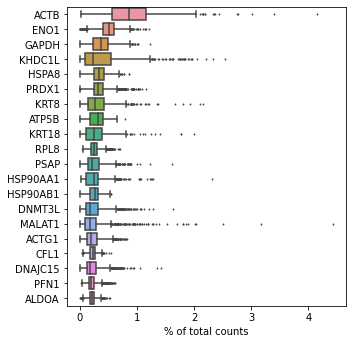

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [9]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2550 genes that are detected in less than 3 cells


/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
       #      jitter=0.4, multi_panel=True)

<AxesSubplot:ylabel='n_genes_by_counts'>

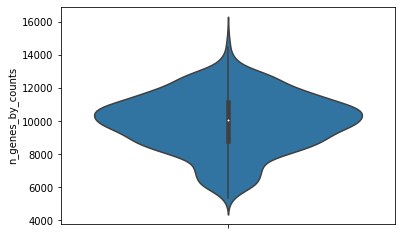

In [12]:
sns.violinplot(y = adata.obs.n_genes_by_counts)

<AxesSubplot:ylabel='total_counts'>

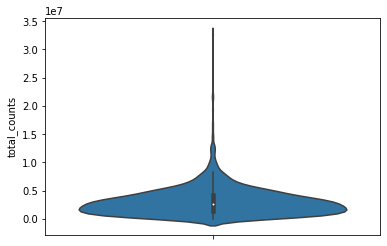

In [13]:
sns.violinplot(y = adata.obs.total_counts)

<AxesSubplot:ylabel='pct_counts_mt'>

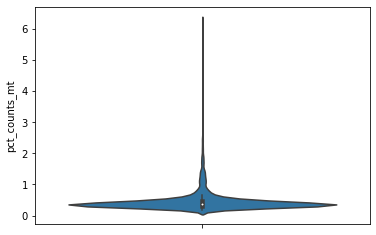

In [14]:
sns.violinplot(y = adata.obs.pct_counts_mt)

/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Batch' as categorical
... storing 'Characteristics[individual]' as categorical
... storing 'Characteristics[developmental stage]' as categorical
... storing 'Characteristics[treatment]' as categorical
... storing 'Characteristics[phenotype]' as categorical
... storing 'Characteristics[inferred lineage]' as categorical
... storing 'Characteristics[inferred trophectoderm subpopulation]' as categorical


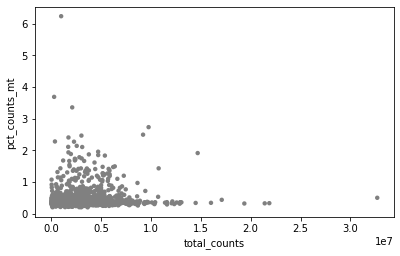

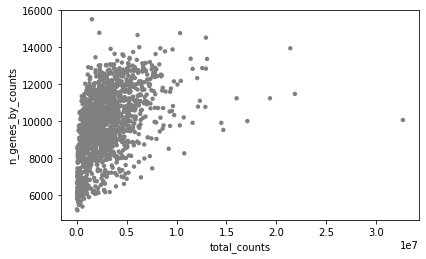

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [16]:
adata = adata[adata.obs.total_counts < 15000000, :]
adata = adata[adata.obs.pct_counts_mt < 3, :]

/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [21]:
adata.raw = adata

In [22]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


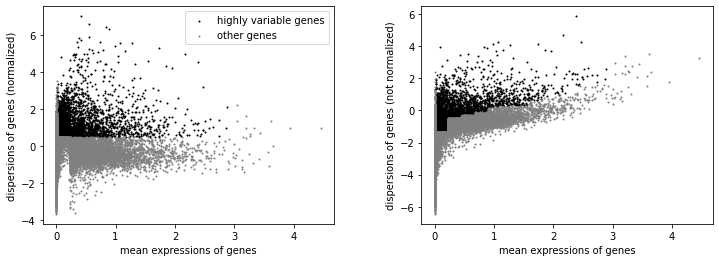

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [24]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:22)


In [25]:
sc.pp.scale(adata, max_value=10)

## Visualização dos dados

In [26]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50


/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:01)


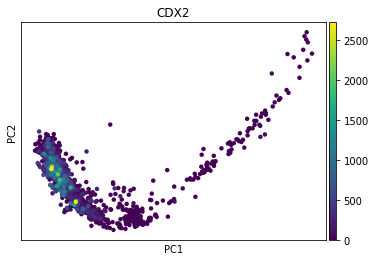

In [27]:
sc.pl.pca(adata, color='CDX2')

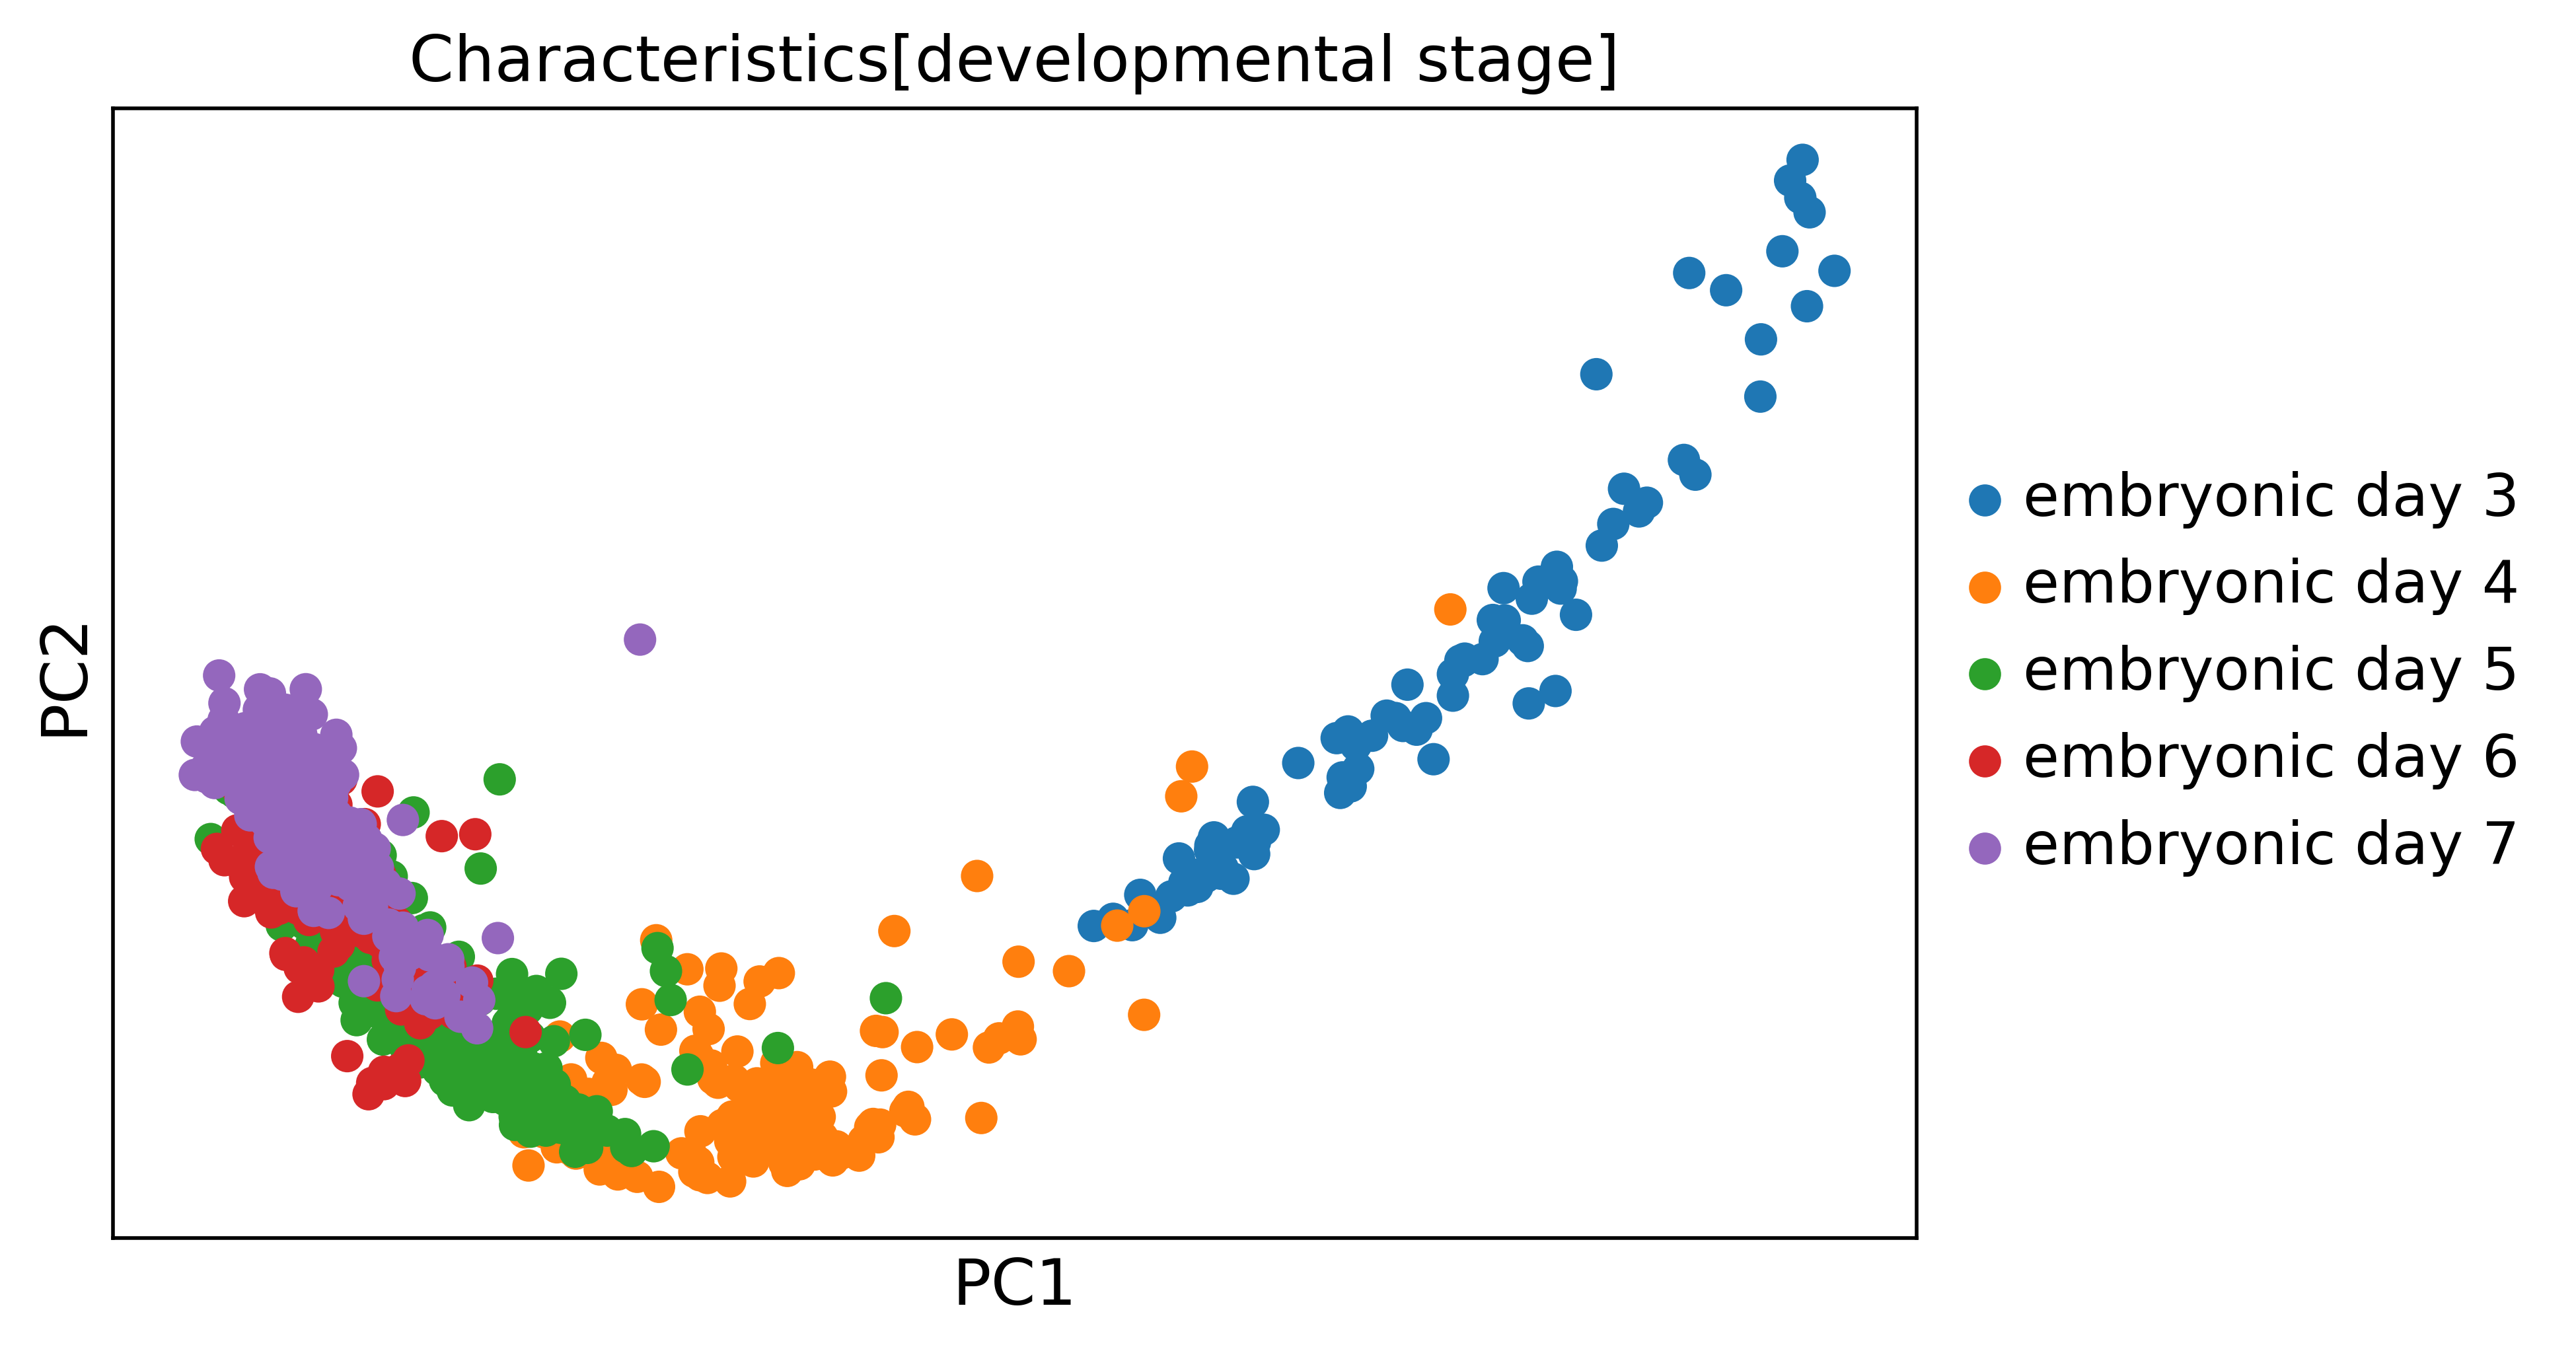

In [63]:
sc.pl.pca(adata, color='Characteristics[developmental stage]', size=200)

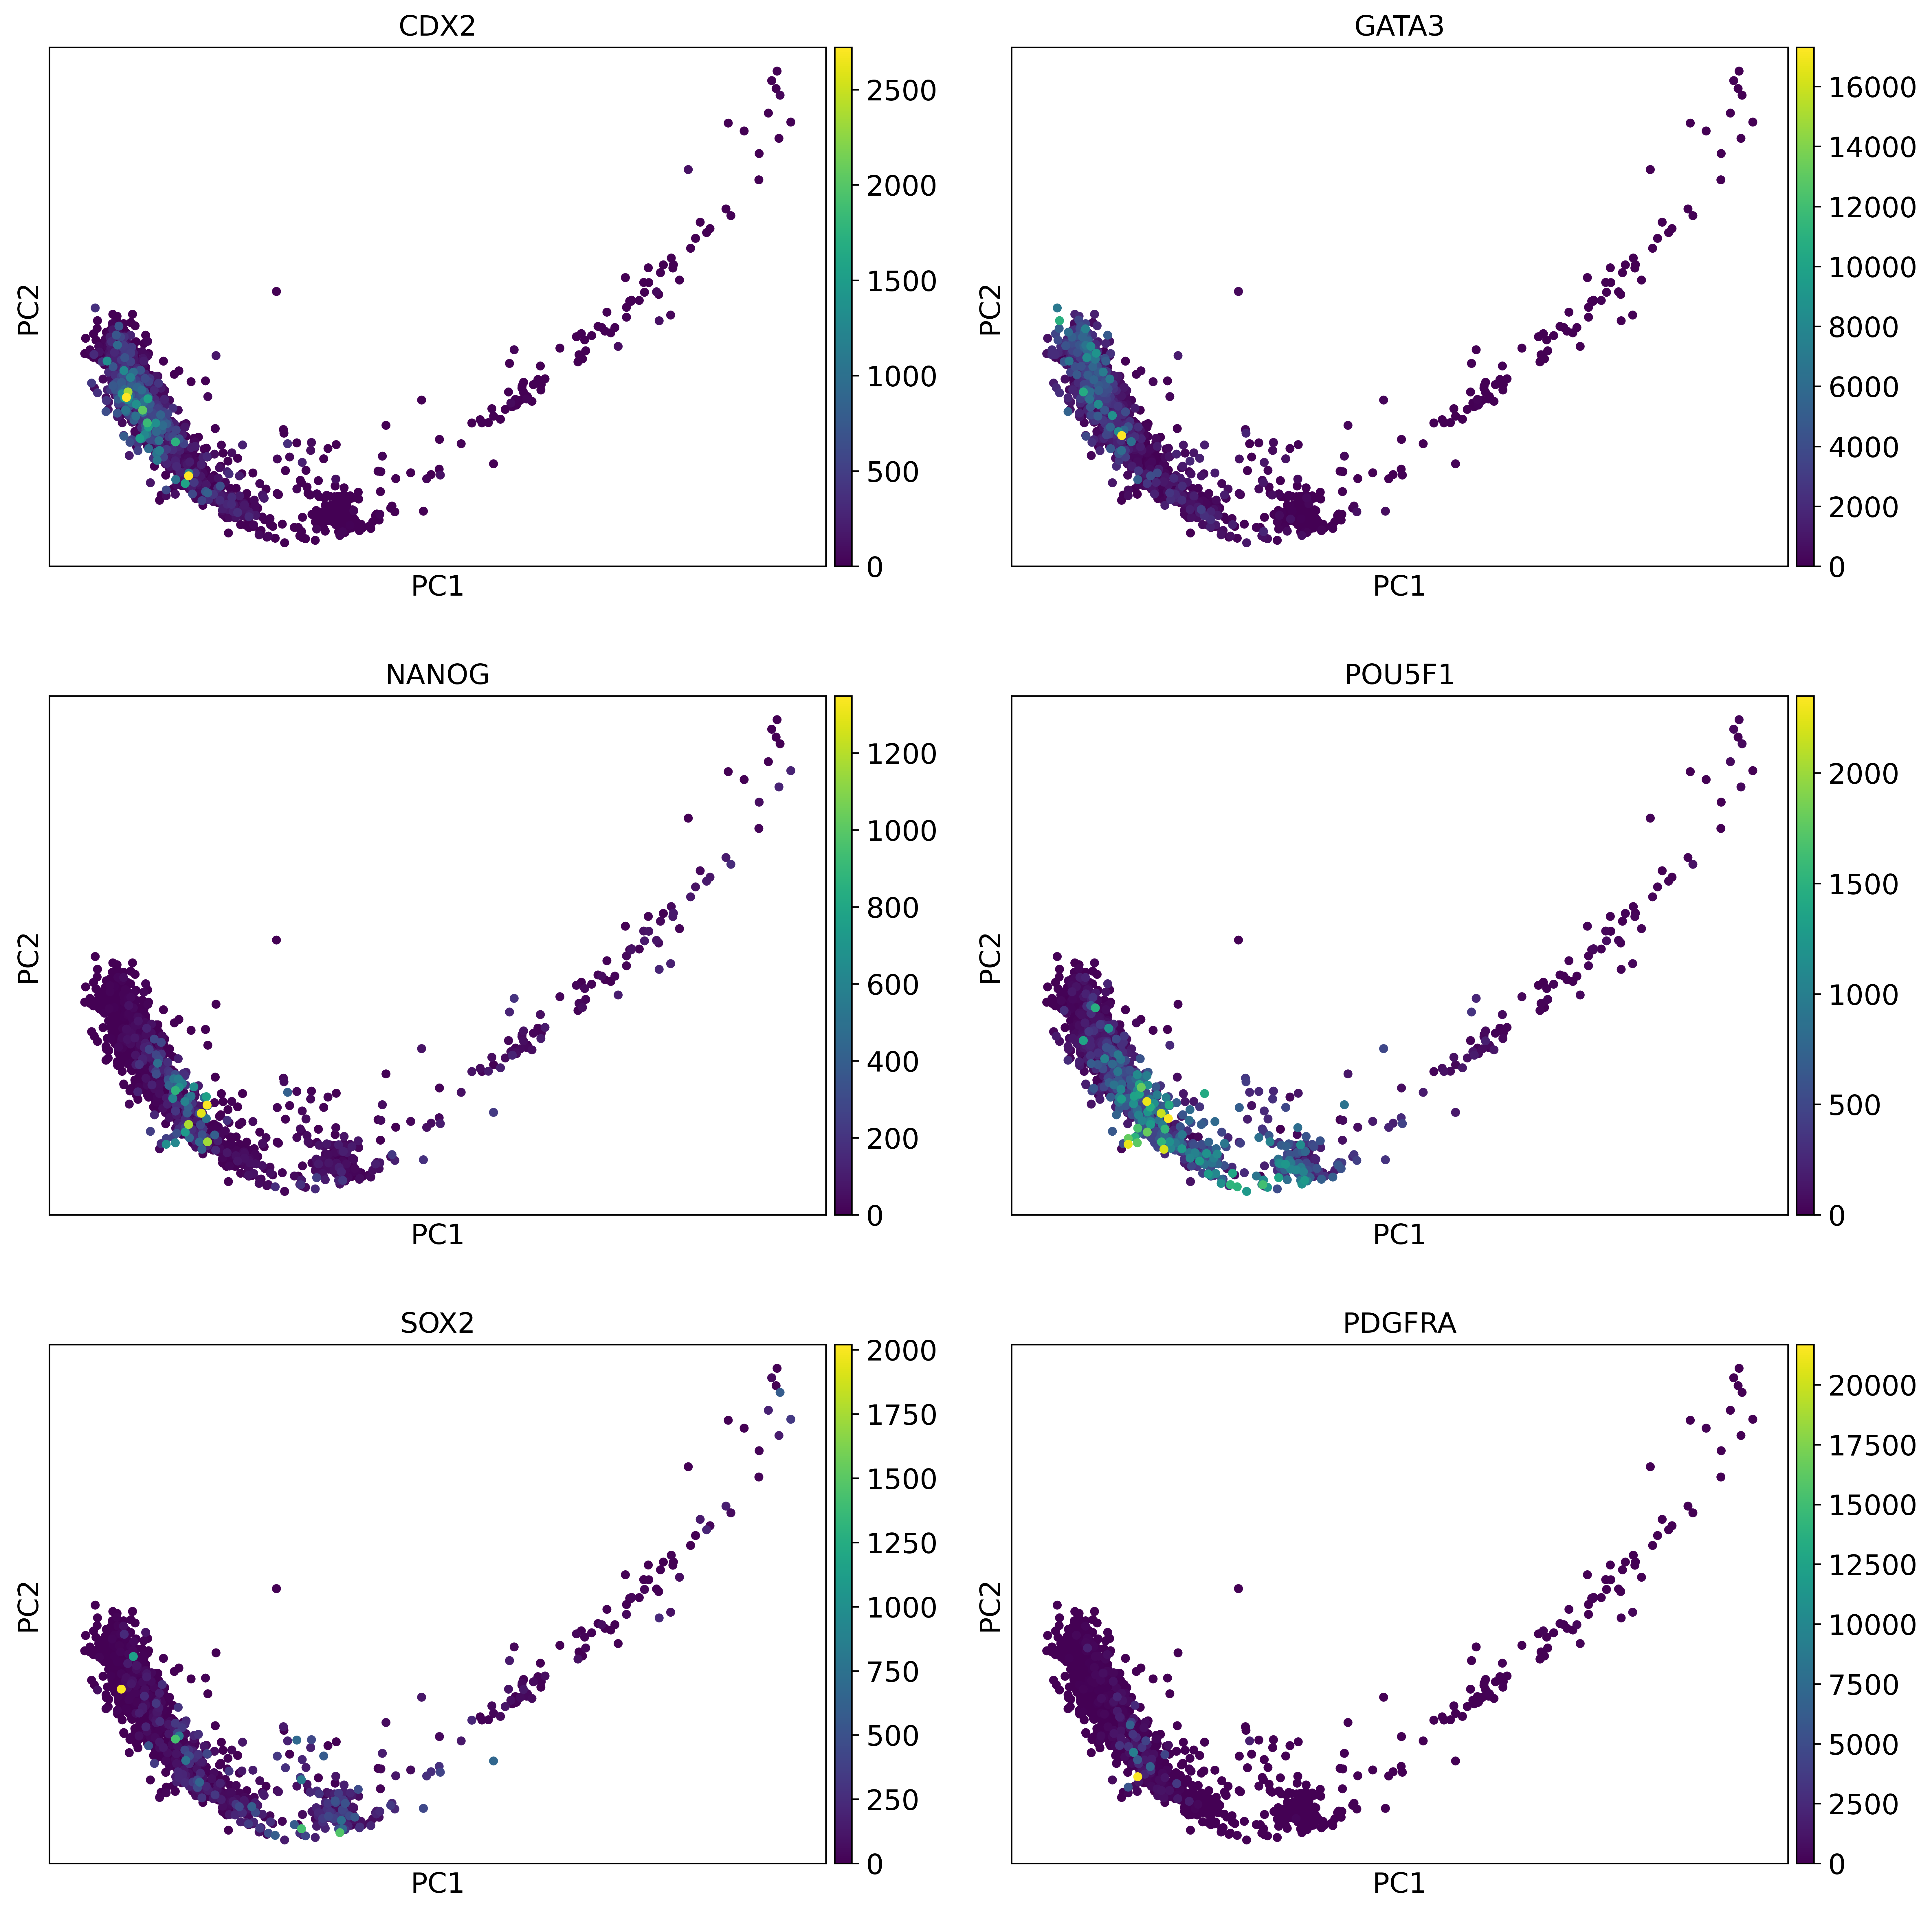

In [59]:
# aqui, se quiser, pode mudar os nomes dos genes para genes que te interesem (quantos quiser). 
#Se der erro, provavelmente o gene que você quer foi filtrado na etapa que seleciona 
# genes altamente variáveis
sc.pl.pca(adata, color=['CDX2', 'GATA3', "NANOG", "POU5F1", "SOX2", "PDGFRA"], ncols=2)

In [36]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40


/home/ana/.local/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


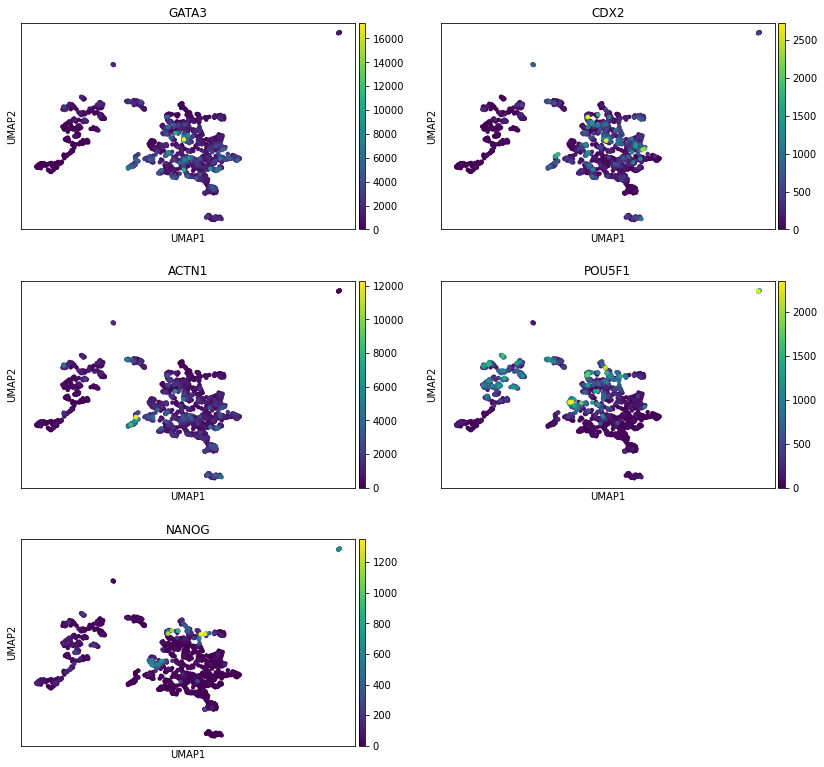

In [31]:
# novamente, escolha os genes e colunas da matriz de metadados que quiser
sc.pl.umap(adata, color=['GATA3', 'CDX2', 'ACTN1', "POU5F1", "NANOG"], ncols=2, )

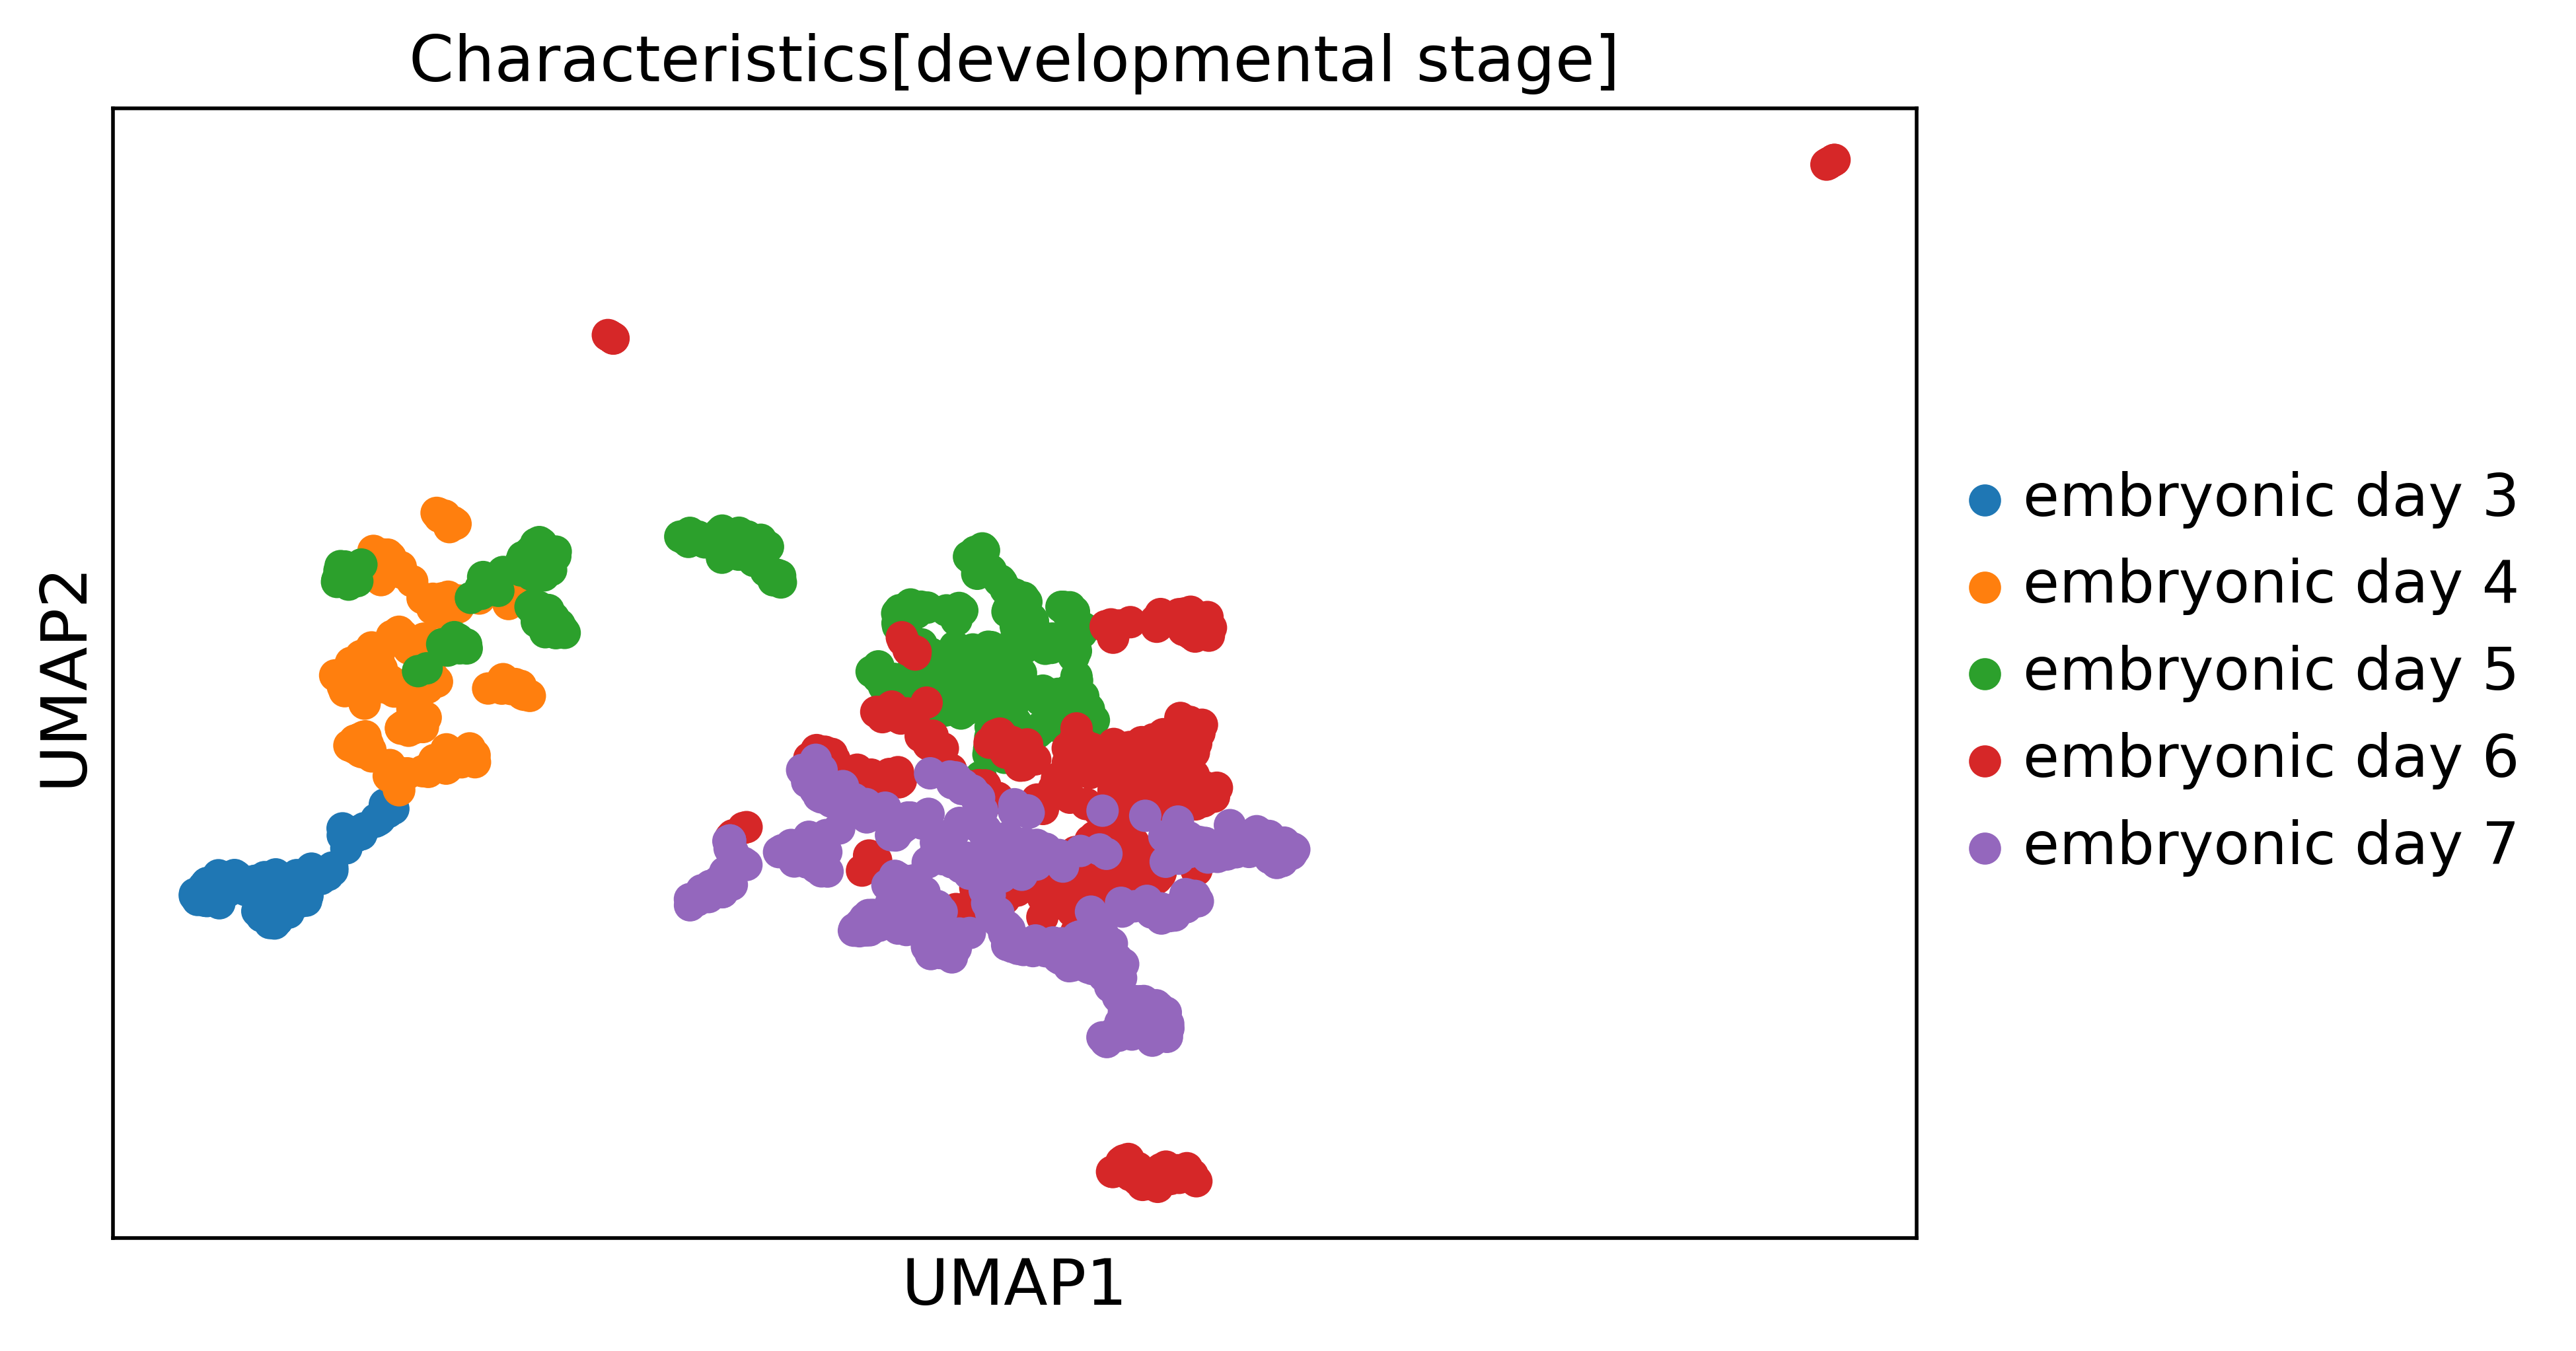

In [64]:
sc.pl.umap(adata, color="coluna dos metadados que identifica as linagens das células", size=200)
# se as células estiverem bem divididas, pode pular direto para a seção "Análise de Expressão Diferencial"

## Análise de Tipo Celulares por Clusters

In [35]:
# clusterização
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 33 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


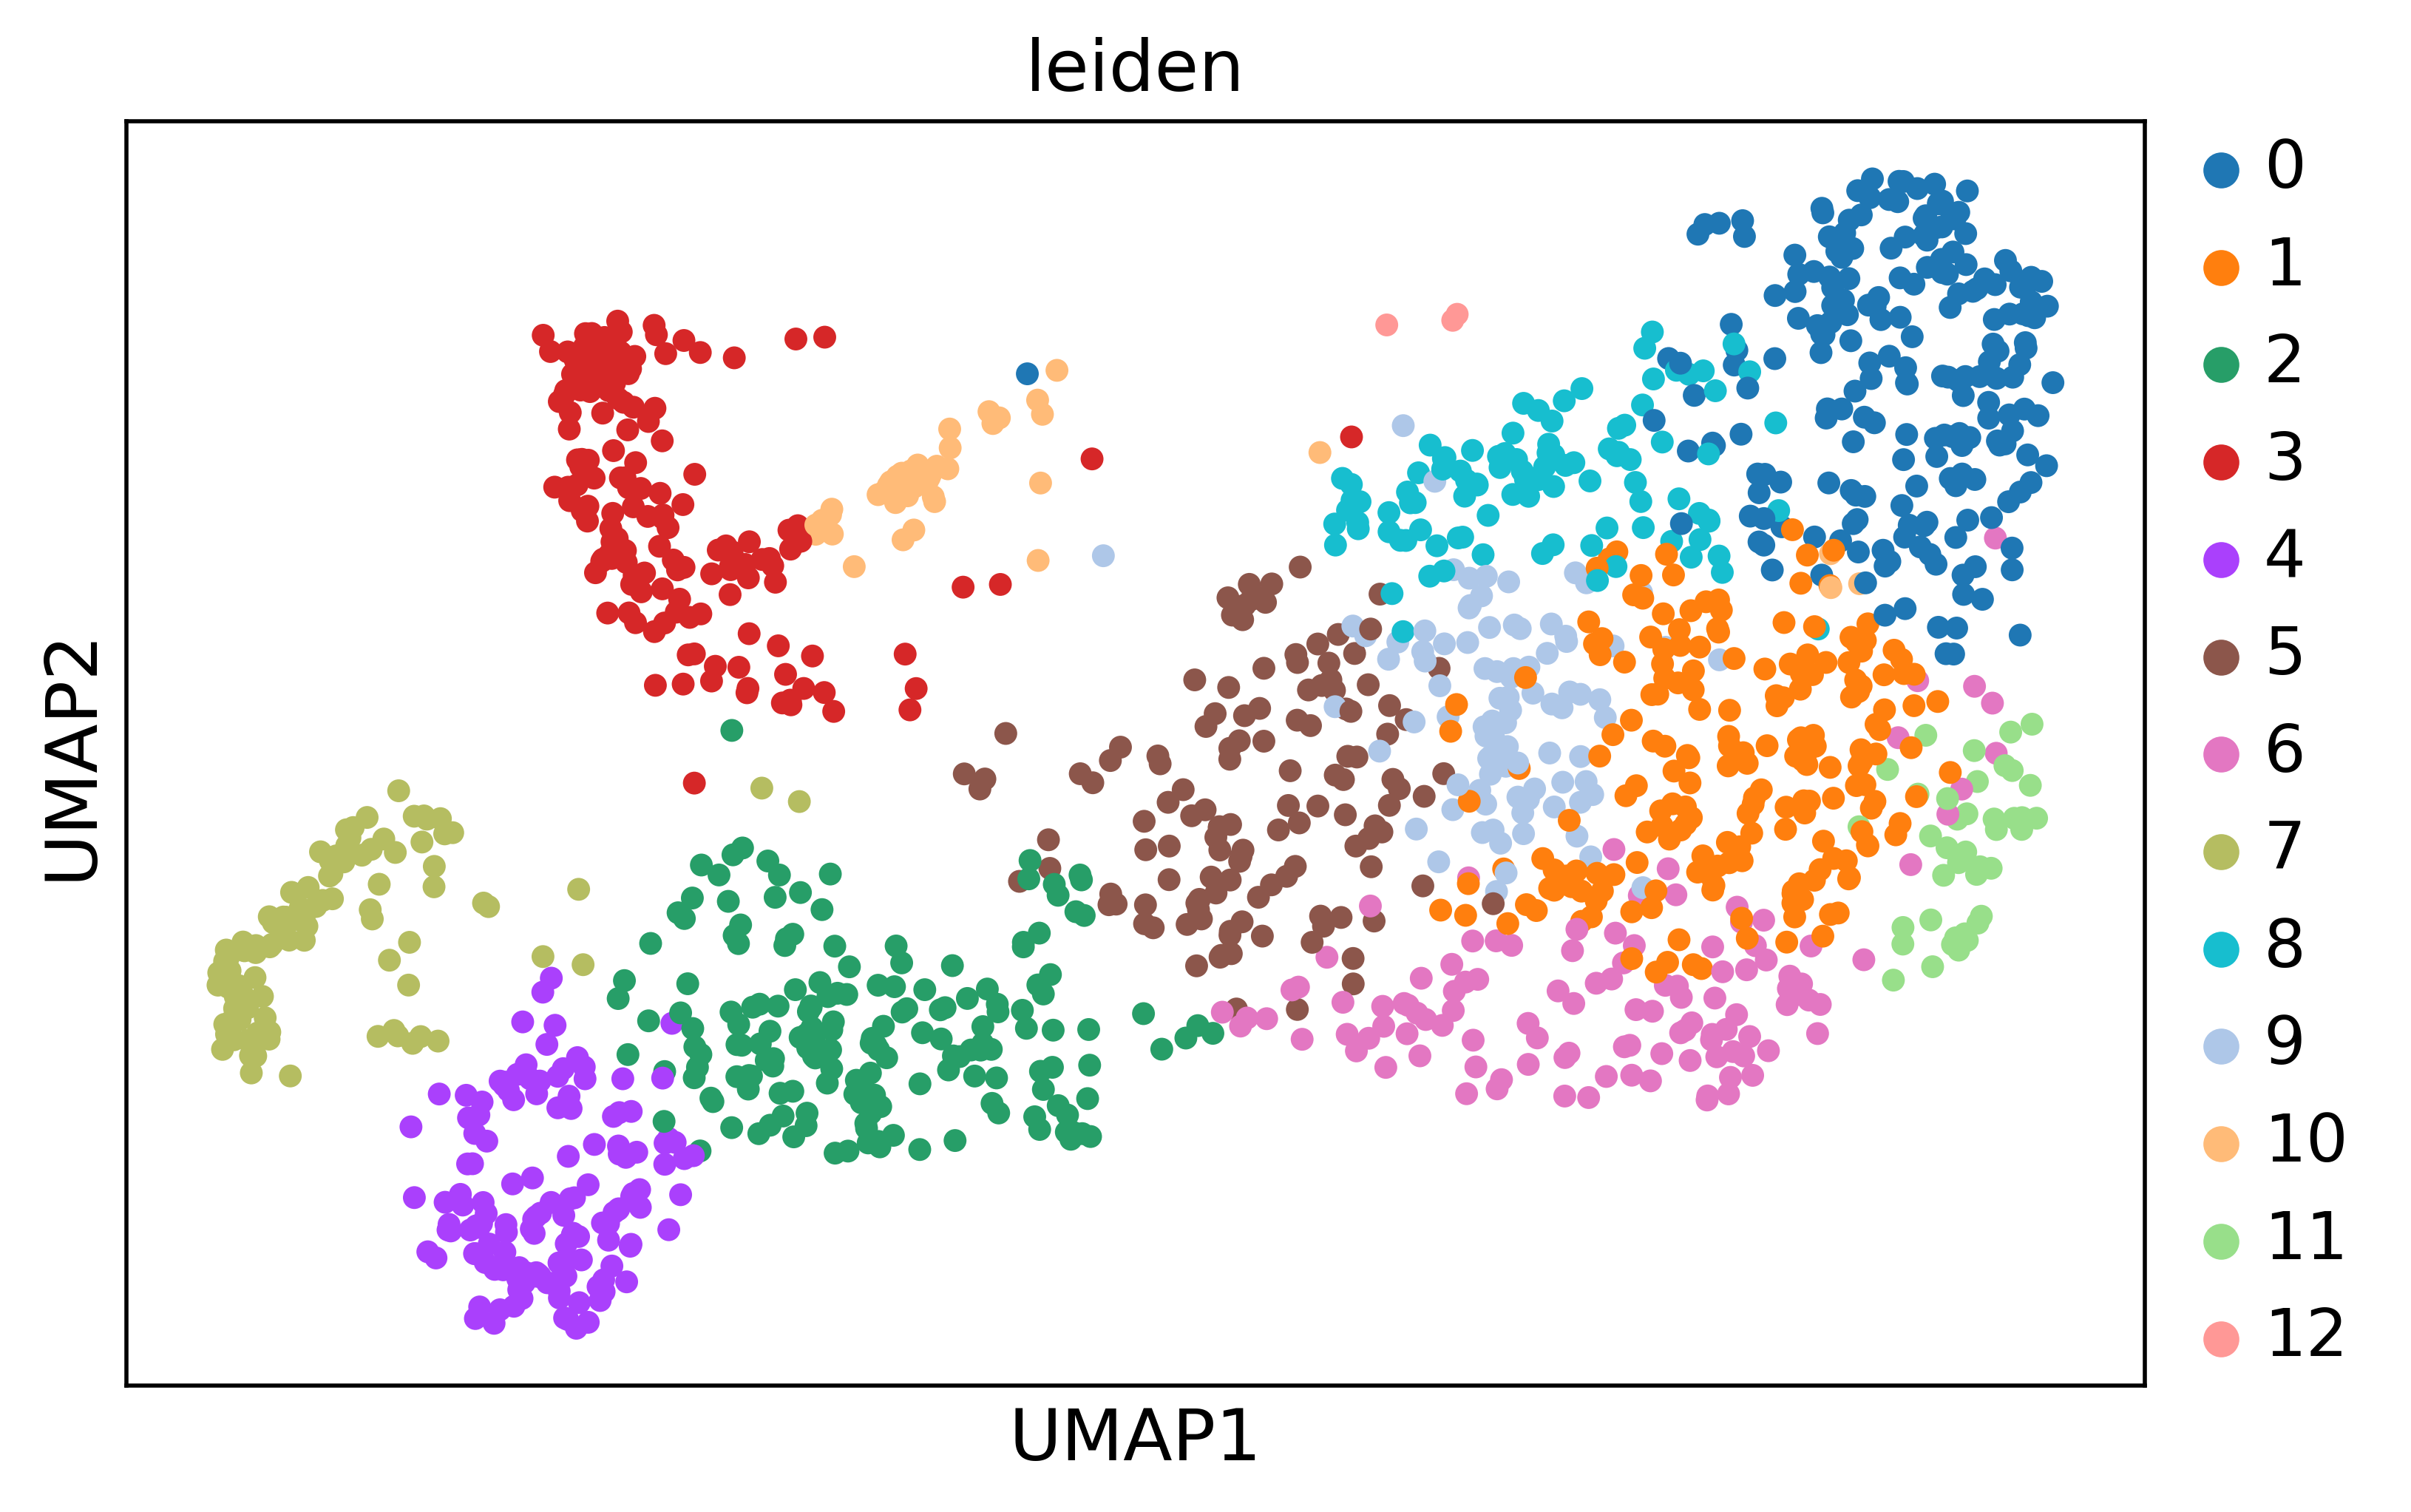

In [87]:
sc.pl.umap(adata, color='leiden')

/home/ana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


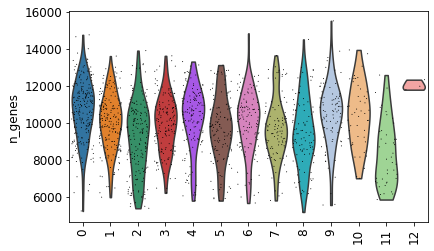

In [53]:
#Number of genes analysis by cluster
sc.pl.violin(adata, ['n_genes'],
             jitter=0.4, groupby='leiden', rotation=90)

/home/ana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


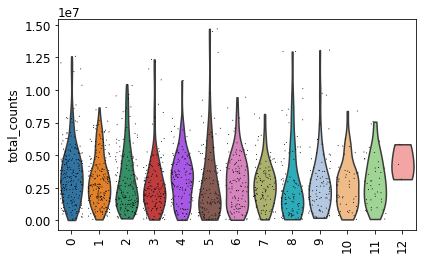

In [54]:
#Number of genes analysis by cluster
sc.pl.violin(adata, ['total_counts'],
             jitter=0.4, groupby='leiden', rotation=90)

/home/ana/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


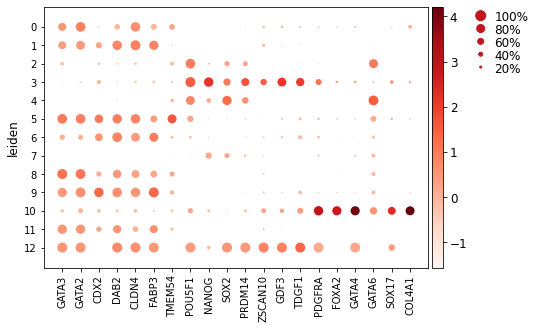

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.0, 0, 0.2, 0.5, 0.25])

In [70]:
# escolher genes marcadores da linhagem de interesse
marker_genes_raw = ['GATA3', 'GATA2', 'CDX2', "DAB2", "CLDN4", "FABP3", "TMEM54",
                    'POU5F1', 'NANOG', "SOX2", "PRDM14", "ZSCAN10", "GDF3", "TDGF1",
                   "PDGFRA", "FOXA2", "GATA4", "GATA6", "SOX17", "COL4A1"]

# pode tentar com use_raw=True também
sc.pl.dotplot(adata, marker_genes_raw, groupby='leiden', use_raw=False)

... storing 'celltype' as categorical


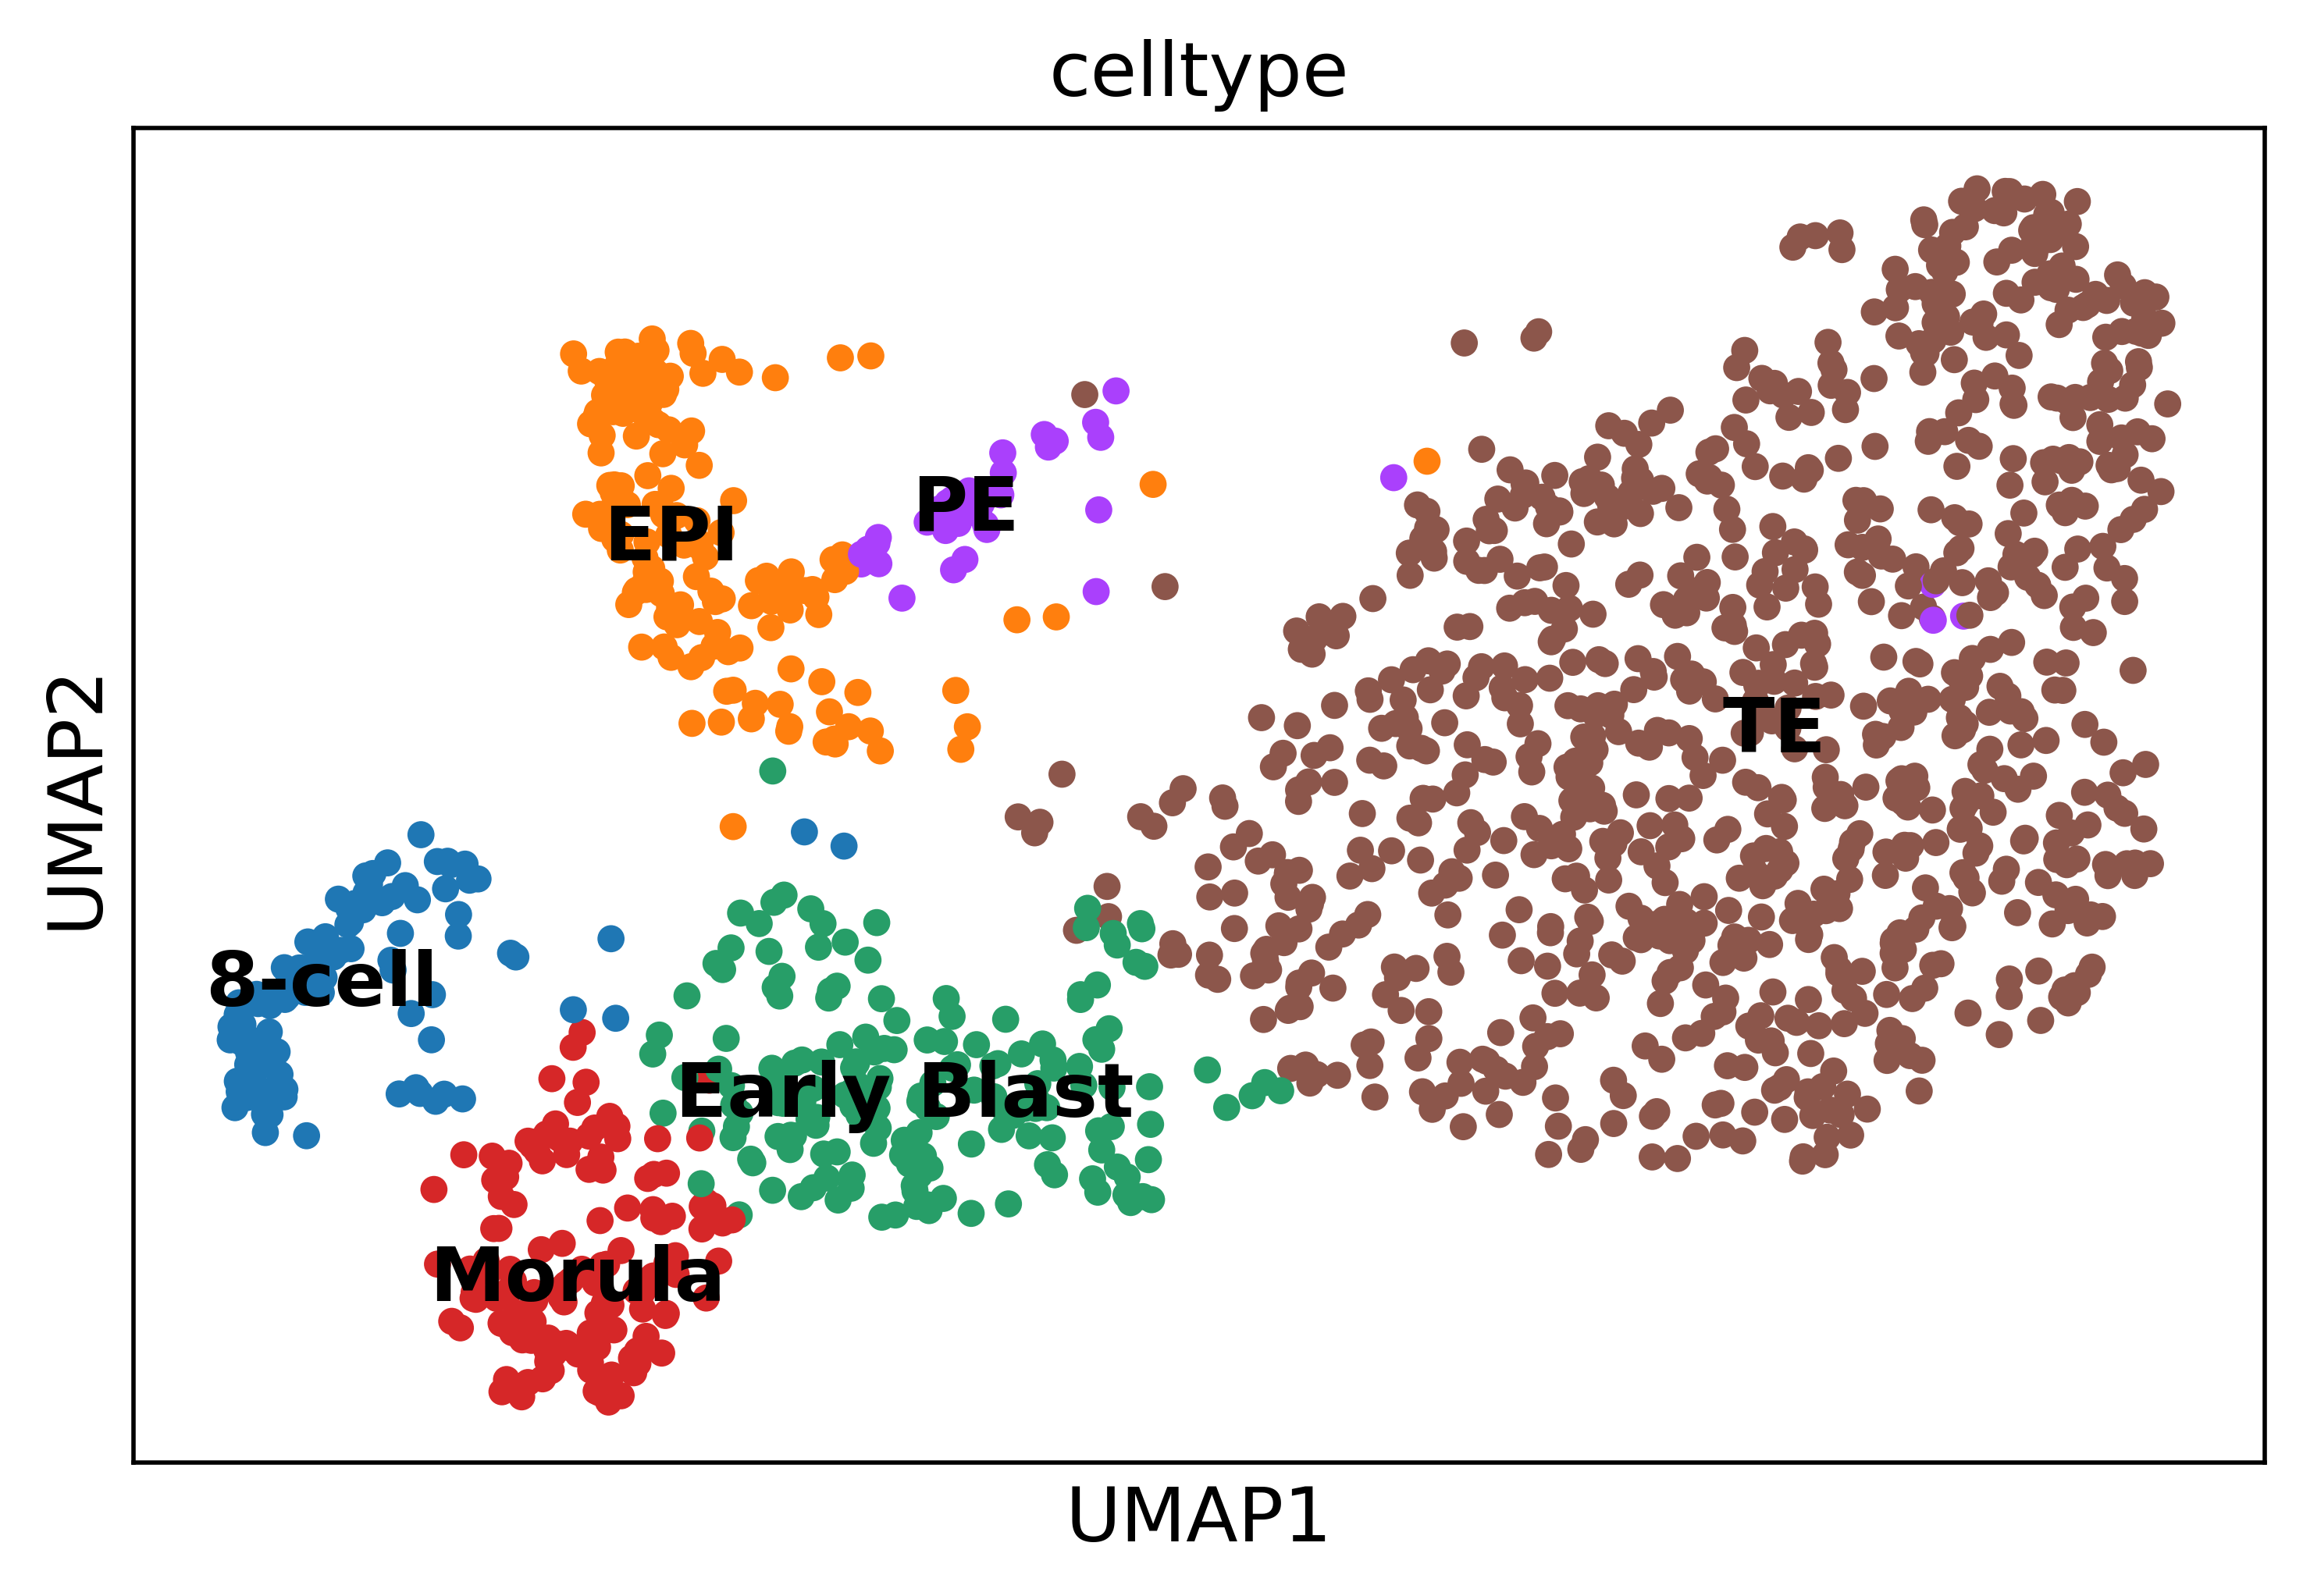

In [98]:
# preencher a lista com os tipos celulares identifcados pelos marcadores.
# Números comentados indicam o número do cluster. No exemplo, cluster 0 = TE, cluster 10 = PE, etc
new_cluster_names = [
    'TE', 'TE', #0,1
    'Early Blast', 'EPI', #2, 3
    'Morula', 'TE',#4, 5
    'TE', '8-cell', #6, 7
    'TE', 'TE', #8,9
    'PE', 'TE', #10, 11
    'TE', #12
]



conv = {str(i):name for i,name in enumerate(new_cluster_names)}
# adiciona nova coluna "celltype" nos metadados do objeto adata contendo os tipos celulares identificados
# Caso queira, essa coluna pode ser usada para análise de expressão diferencial
adata.obs['celltype'] = [conv[x] for x in adata.obs['leiden']]

sc.pl.umap(adata, color=['celltype'], legend_loc= 'on data', size=100)

## Análise de Expressão Diferencial

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/ana/.local/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/ana/.local/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's


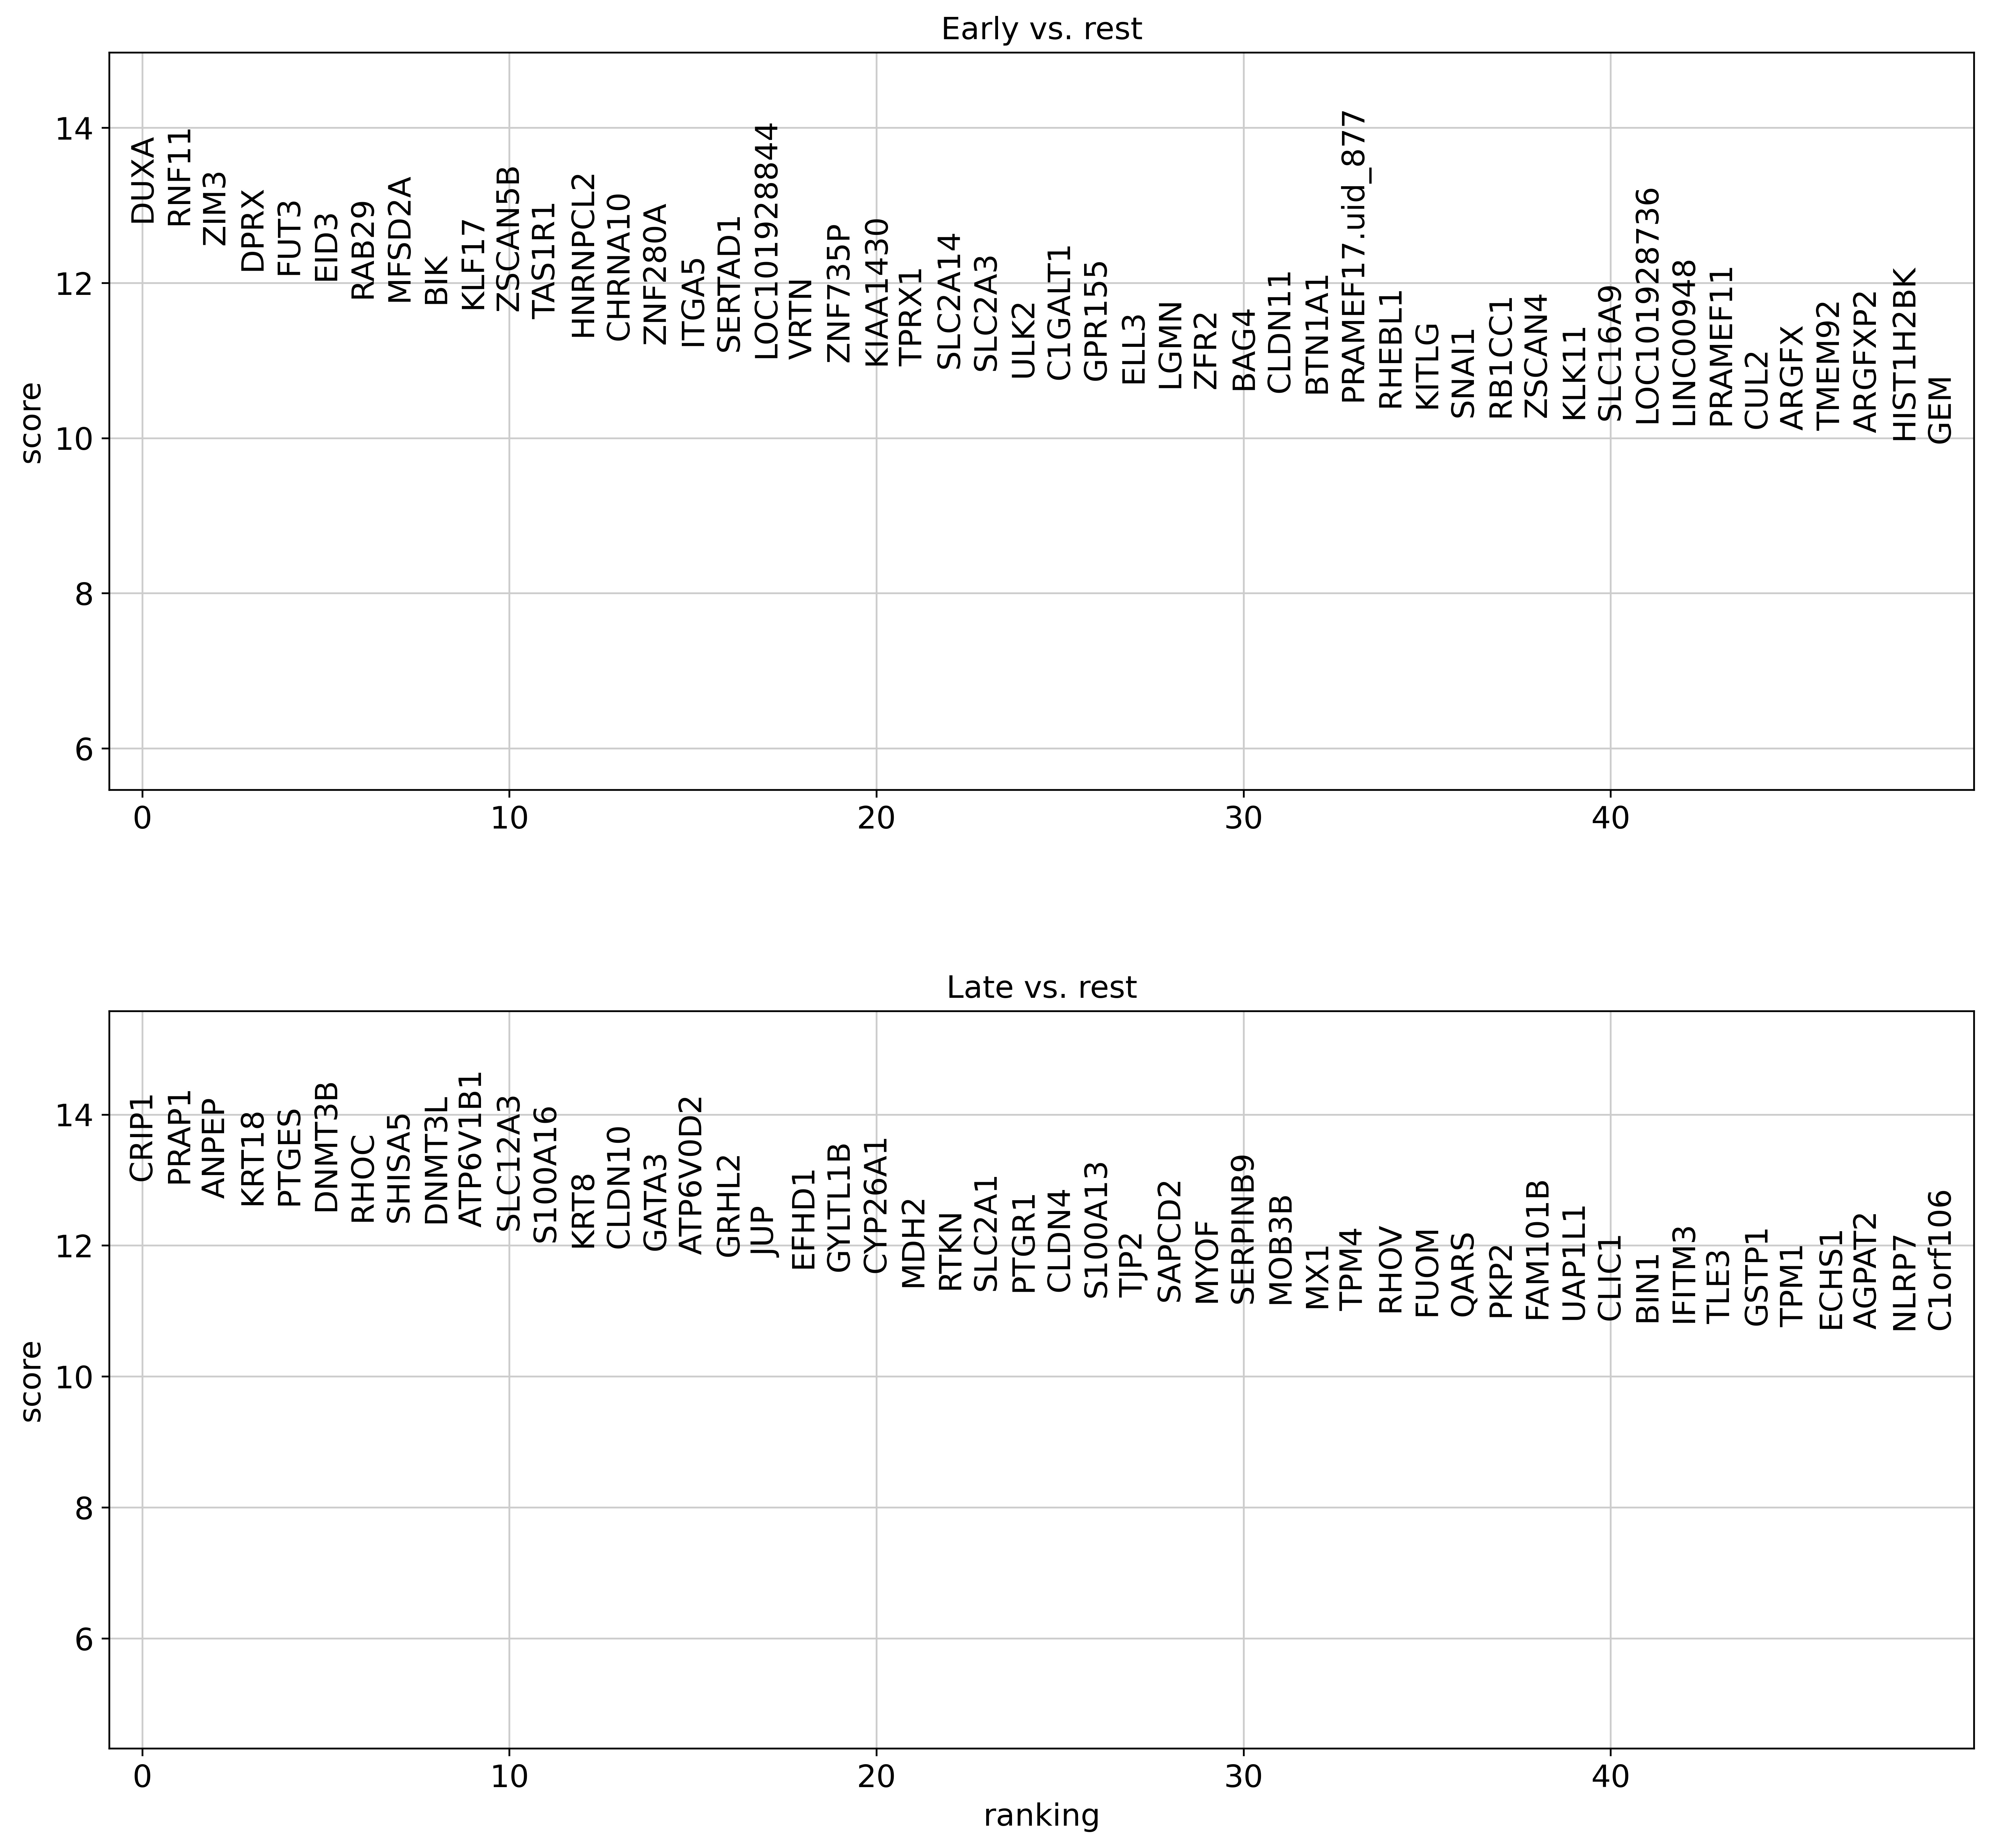

In [55]:
# rodar a análise. 'group' deve ser o nome da coluna com a informação dos tipos celulares a serem
# analisados
sc.tl.rank_genes_groups(adata, 'group', method='wilcoxon', n_genes=1000)
# tamanho da figura
pylab.rcParams['figure.figsize'] = (15, 7)
sc.pl.rank_genes_groups(adata, n_genes=50, sharey=False, ncols=1, fontsize=14)

In [56]:
# checar os 10 genes mais importantes para cada gruṕo (pode trocar o "10" pelo valor que quiser)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

Early      Late
0    DUXA     CRIP1
1   RNF11     PRAP1
2    ZIM3     ANPEP
3    DPRX     KRT18
4    FUT3     PTGES
5    EID3    DNMT3B
6   RAB29      RHOC
7  MFSD2A    SHISA5
8     BIK    DNMT3L
9   KLF17  ATP6V1B1

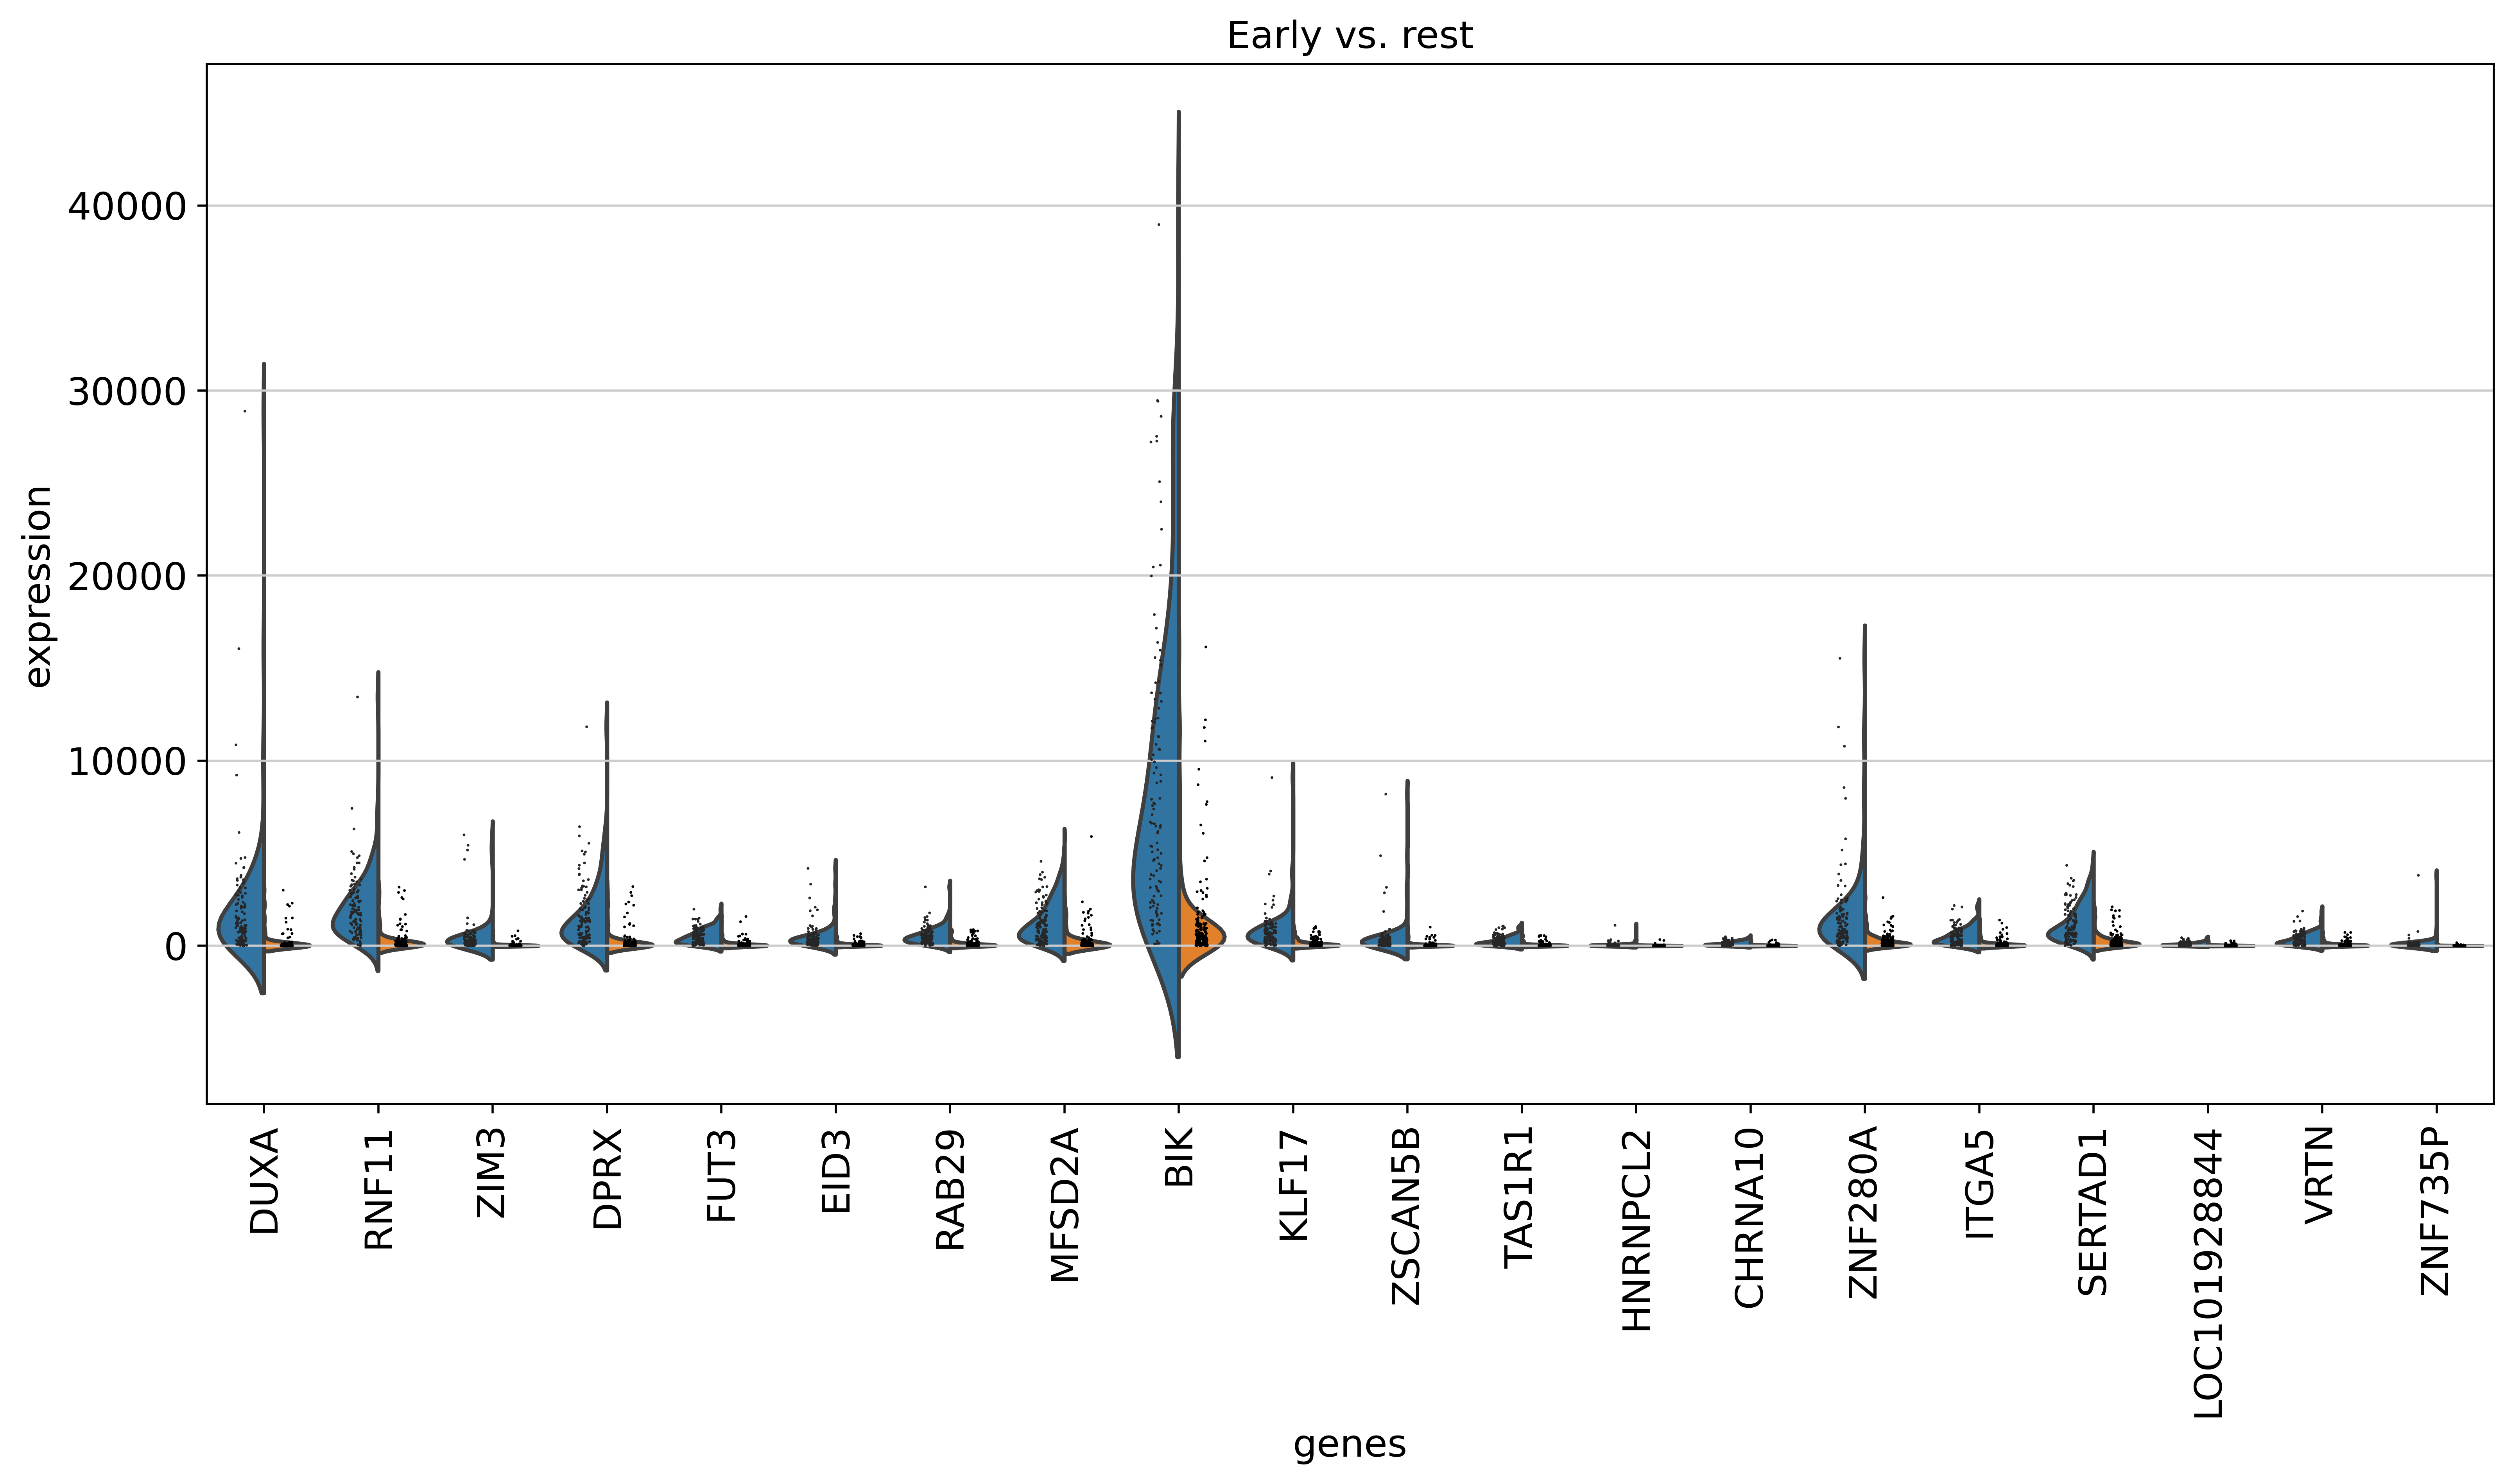

In [58]:
# trocar "Early" pelo tipo celular desejado
sc.pl.rank_genes_groups_violin(adata, groups='Early', n_genes=20)

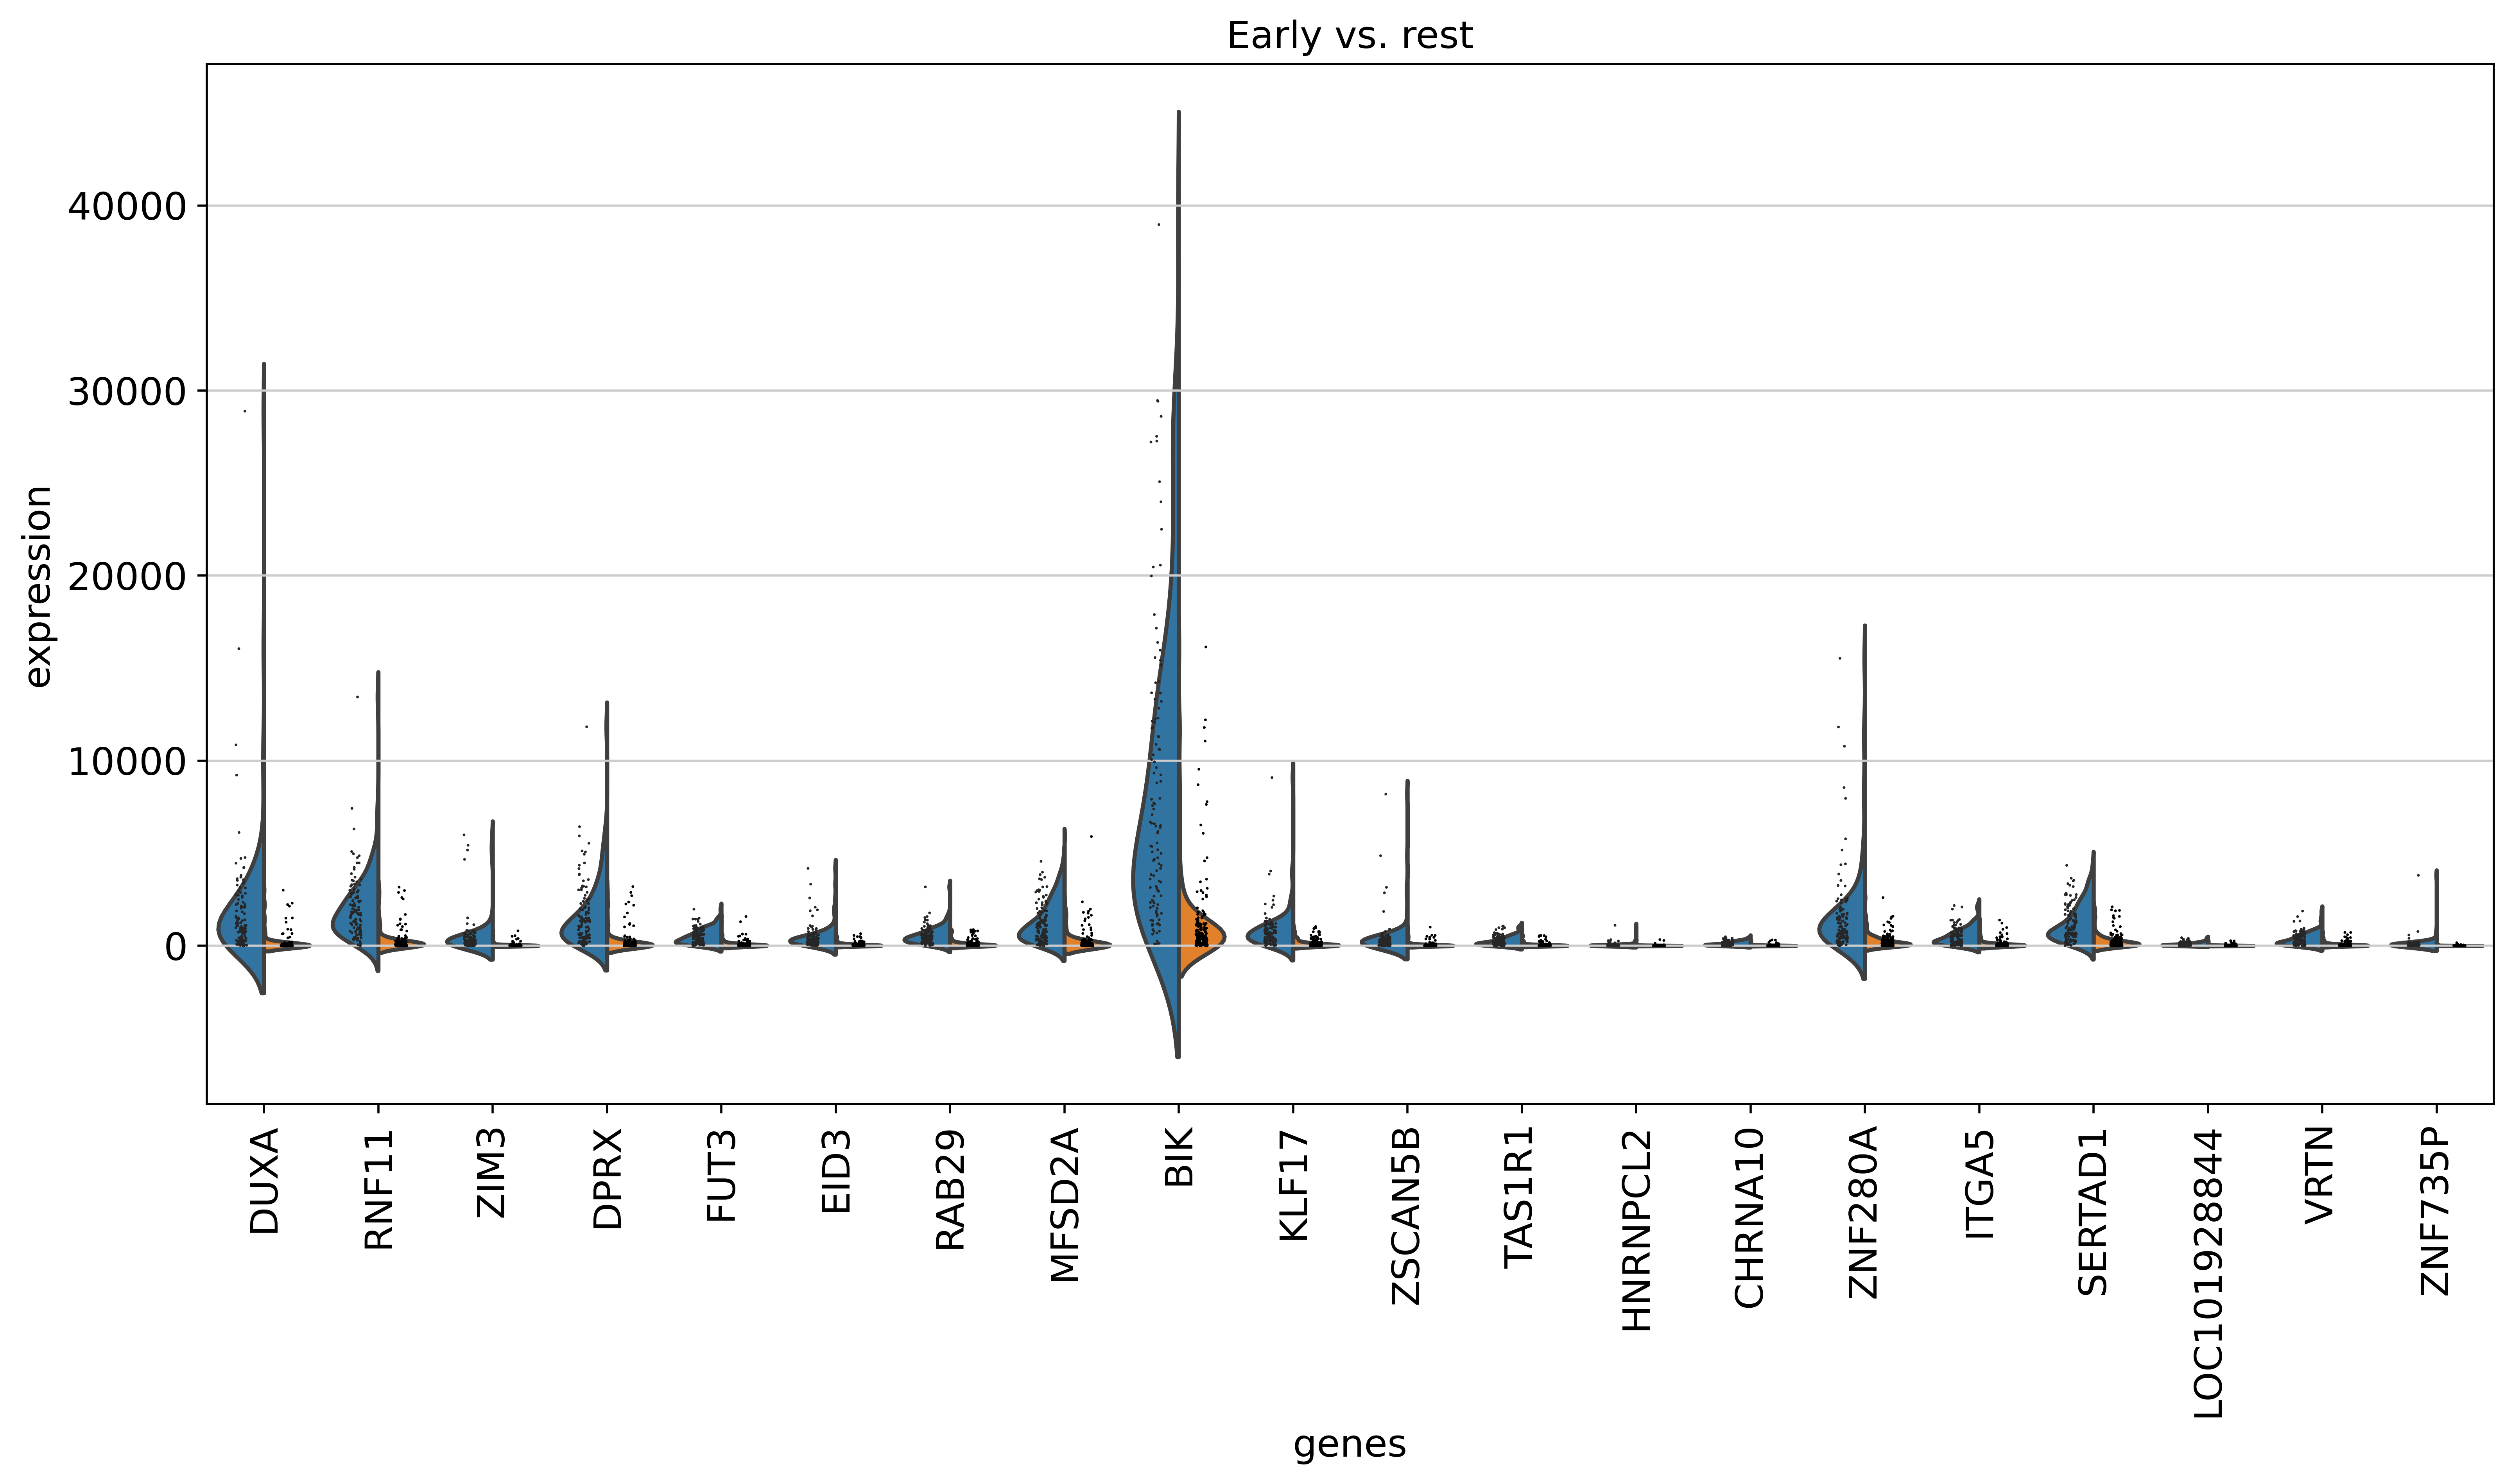

In [58]:
# trocar "Early" pelo tipo celular desejado
sc.pl.rank_genes_groups_violin(adata, groups='Early', n_genes=20)

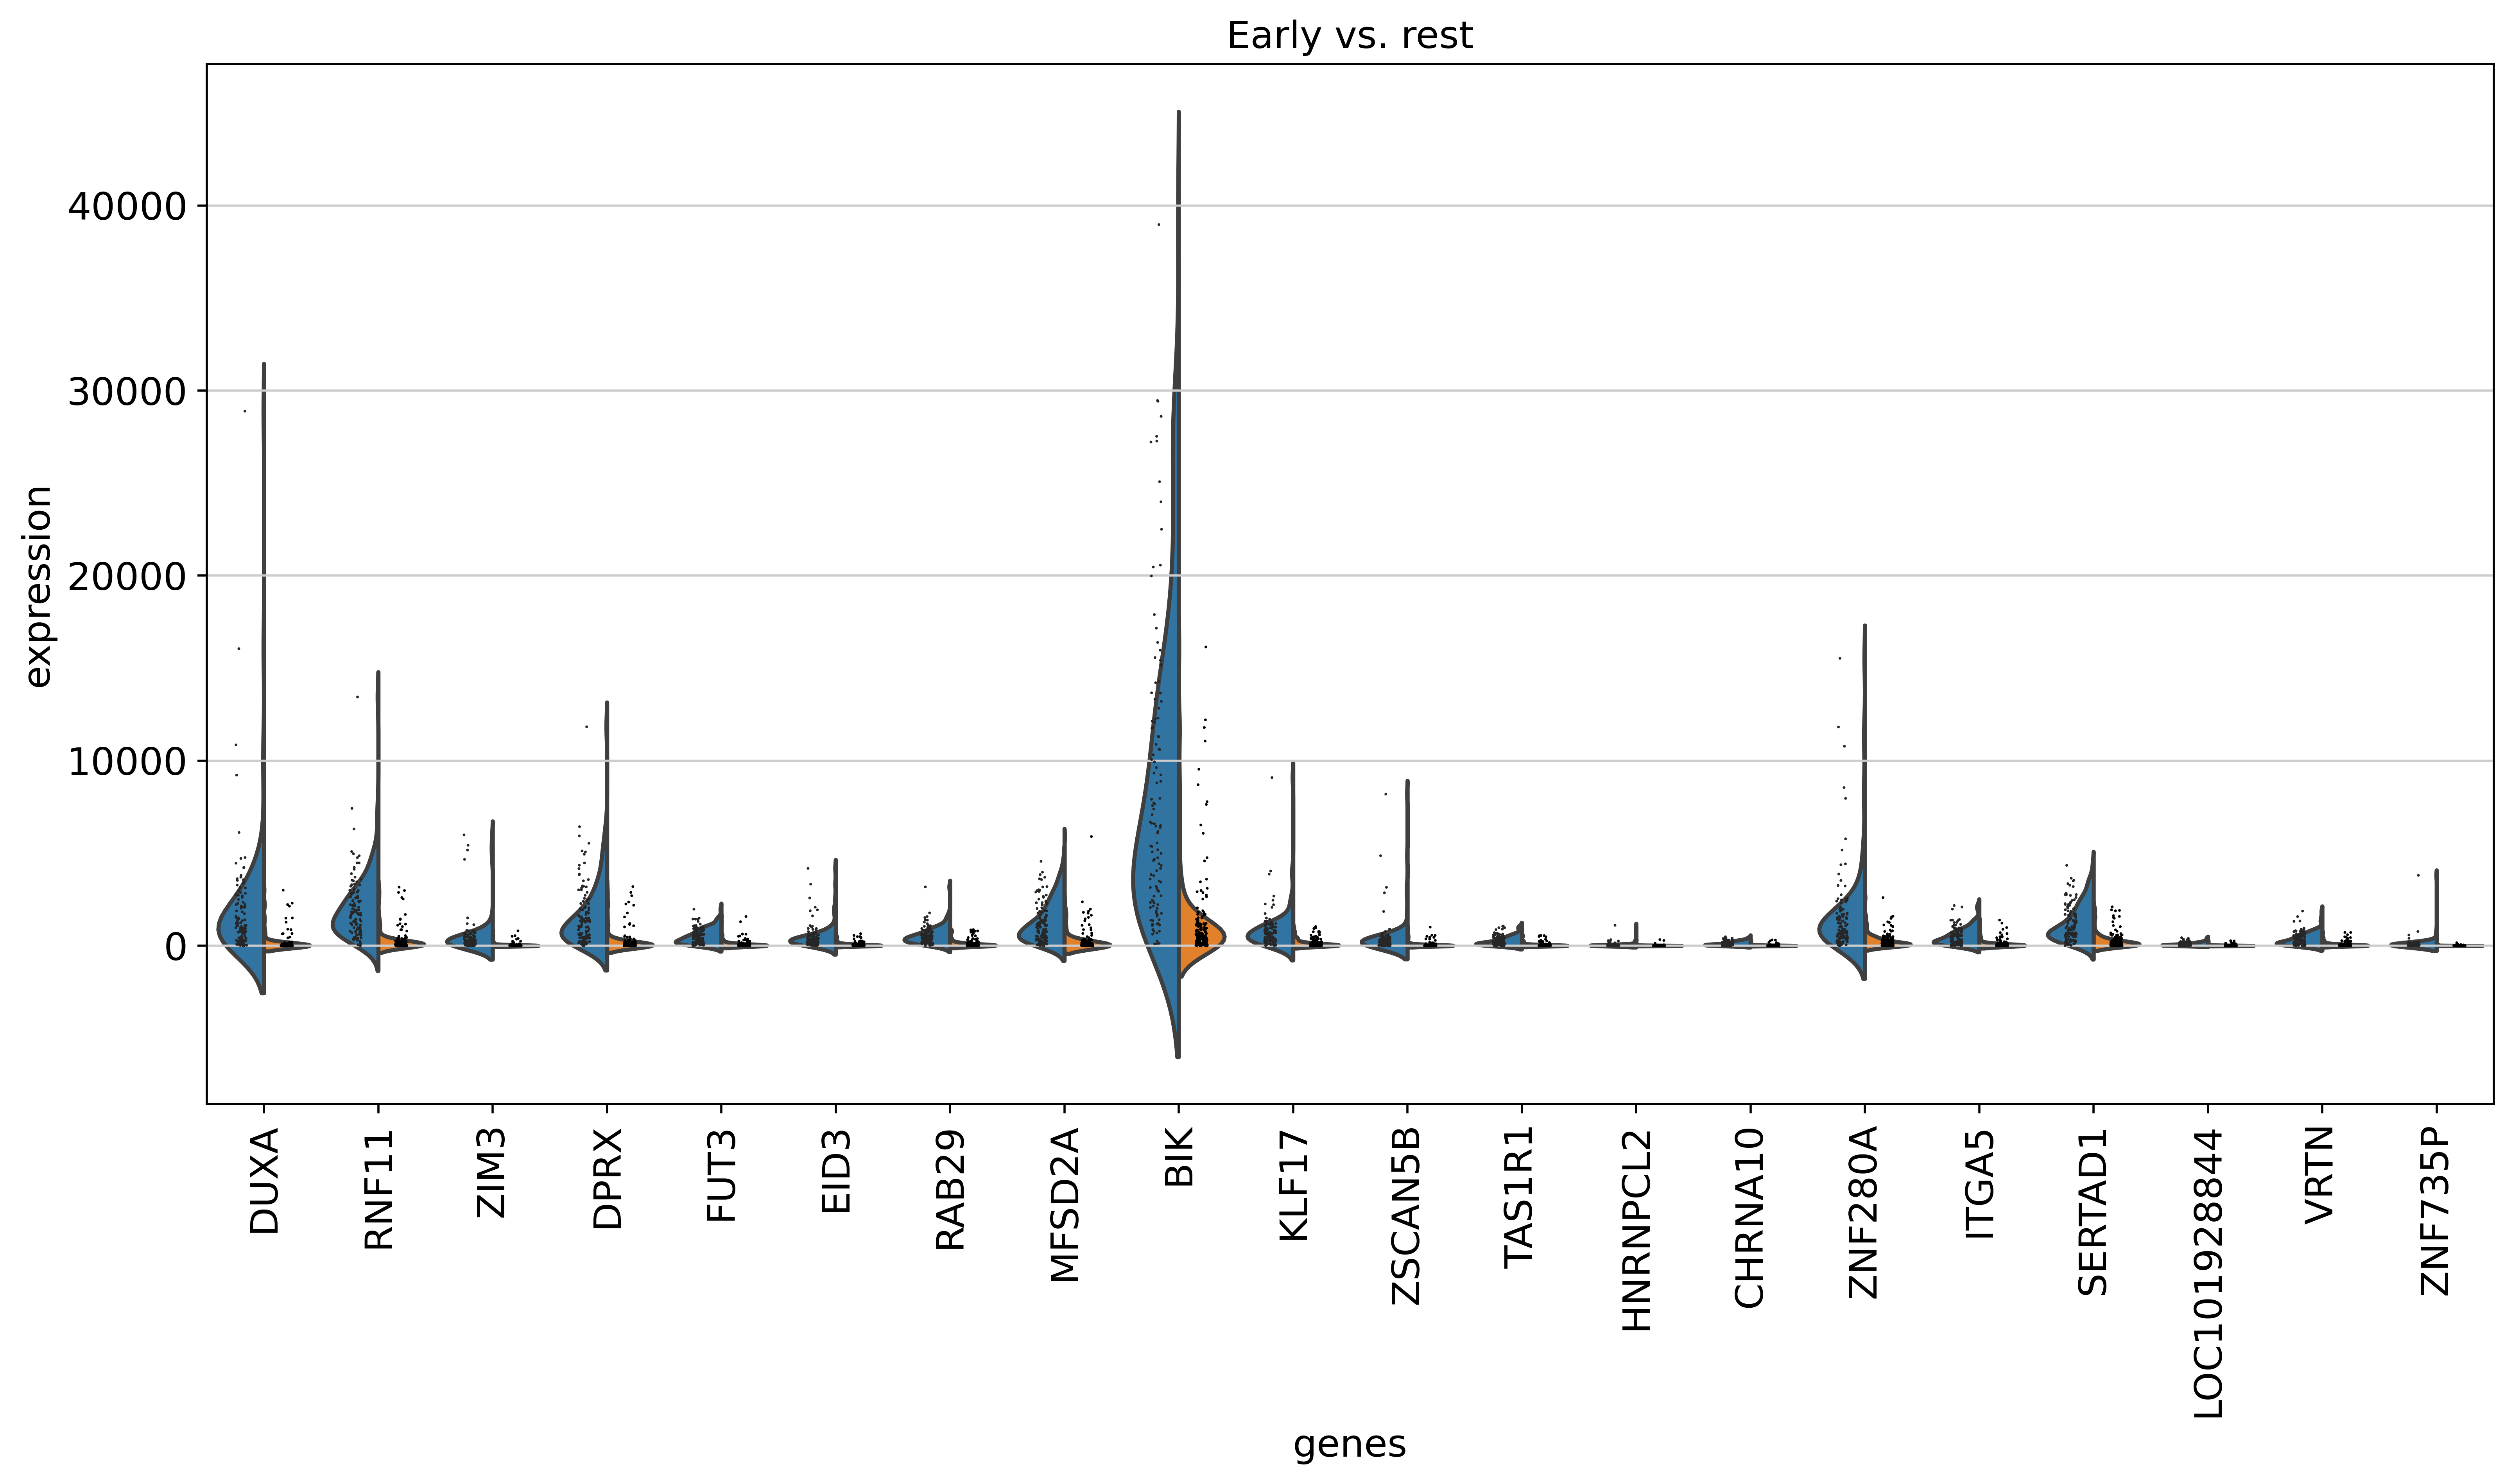

In [58]:
# trocar "Early" pelo tipo celular desejado
sc.pl.rank_genes_groups_violin(adata, groups='Early', n_genes=20)

In [60]:
# cria uma tabela com genes diferencialmente expressos e valores p
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_rank = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

Early_n       Early_p  Late_n    Late_p
995    DPM1  4.344886e-08   ATP5J  0.000015
996    AGO1  4.396542e-08  SHKBP1  0.000015
997    TAF5  4.413892e-08  MBTPS2  0.000015
998  BTBD18  4.573064e-08   KLHL5  0.000015
999    MCL1  4.573064e-08    GCH1  0.000015

In [60]:
# imprimir todos os genes com valor p menor que 0.05 (selecione o valor p que quiser)
for i in adata.obs["colocar aqui o nome da coluna com os tipos celulares"].unique():
    k = set(gene_rank.loc[gene_rank[str(i) + "_p"] <0.05, str(i) + "_n"])
    print("Tipo celular: " + str(i))
    print("Genes selecionados: " + str(len(k)))
    print(" ".join(k))

528
HIST1H2BC FAM228A AP1S3 FAM13B TFB2M HHLA2 IL13RA2 TRAPPC6B KBTBD2 RFK SAMD8 KIF14 GPNMB KIAA1430 L1TD1 DPRX ZBTB9 ZDHHC17 ZSCAN5B MOK FANCE LAMTOR3 FAM214B SERTAD1 CCDC82 EFNA2 WDR92 ABCC6P1 PPAP2C LOC102724153 GPR143 ACOT11 SYCP1 RHEBL1 ZNF98 DUSP18 ZNF669 JMY ACTL8 PRR19 ZFP62 TEX19 SYS1 WBP5 KHDC3L SSX2IP MSL3P1 MSRB1 ZNF679 RNF138P1 NXT2 OASL BRDT BIK LGMN PAX9 MTMR14 ACSS2 ZBTB8A AIP LOC100506990 EPN2-IT1 LOC441455 RNFT1 FAM53C SRP9 JKAMP TNNI3 SOAT2 SLU7 MED31 FKBP6 SIAH1 DLL3 STIM1 MAST3 RRM2 USP7 MAPKBP1 GEM ARL15 CASP6 BAGE HELB ZNF101 PCED1B MAPKAPK5-AS1 TAS1R1 RAP1B NEURL1 ADM ZNF668 TMEM229B OOSP2 TRMT10C SLC41A1 JAG1 CDS2 ZIM2 TMEM99 KLK11 TOR1B PFKFB3 TBC1D9 HVCN1 CYTH1 MOSPD1 RAB2B RPS6KC1 ZIM3 TCL1B NTNG1 KCNH5 RRS1 MAP1B ZNF232 ABTB1 TTC39C ZNF626 FAM214A C15orf41 DDX4 MBIP LDLRAD4 ABHD14B UBTD1 HNRNPCL2 ZBTB37 ENO2 MORN2 DIS3L2 ZNF268 NUCB2 DCAF4L1 ITGA5 RNF168 ETV4 LDHA ZNF716 PCDHB3 MED18 KPNA6 TUBB8 SLC2A3 WNK3 SNAPC2 CEP97 MFSD2A TRPC7 CAB39L KIAA1191 SELM FS

## Salvar os resultados

In [99]:
# salvar o objeto adata. Pode mudar o nome e endereço, se quiser
adata.write('./adata.h5ad')

In [ ]:
# da próxima vez, não precisa rodar as análise de novo. Basta ler o objeto adata salvo:
adata = adata = sc.read_h5ad('./adata.h5ad')

pensei que talvez você queira salvar as imagens também! Para salvar um imagem, clique com o 
botão direito do mouse nela, depois em "create new view for output". Em seguida, clique com o botão 
direito do mouse na janela aberta e escolha se quer salvar, copiar...